In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
from pandas.tseries.offsets import MonthEnd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Display all columns
pd.set_option('display.max_columns', None)

In [3]:
#LOAD THE DATA
df_market = pd.read_excel('Case3_Market data.xlsx')

In [4]:
df_market

Unnamed: 0  \
0    Index 2010=100 (if not otherwise noted)   
1                                       date   
2                                     2004m2   
3                                     2004m3   
4                                     2004m4   
..                                       ...   
216                                  2021m12   
217                                   2022m1   
218                                   2022m2   
219                                   2022m3   
220                                   2022m4   

                                        China  \
0    Production Index Machinery & Electricals   
1                              MAB_ELE_PRO156   
2                                   16.940704   
3                                   23.711852   
4                                   24.435235   
..                                        ...   
216                                310.763183   
217                                235.956129   
218                                235.956129   
219                                329.413367   
220                                267.373145   

                                     China.1  \
0    Shipments Index Machinery & Electricals   
1                             MAB_ELE_SHP156   
2                                  16.940704   
3                                  23.711852   
4                                  24.435235   
..                                       ...   
216                               310.763183   
217                               235.956129   
218                               235.956129   
219                               329.413367   
220                               267.373145   

                                       France  \
0    Production Index Machinery & Electricals   
1                              MAB_ELE_PRO250   
2                                  112.091273   
3                                  136.327976   
4                                  117.791806   
..                                        ...   
216                                100.565744   
217                                 85.743503   
218                                  90.60354   
219                                107.843548   
220                                  87.69811   

                                    France.1  \
0    Shipments Index Machinery & Electricals   
1                             MAB_ELE_SHP250   
2                                  83.458866   
3                                 106.168192   
4                                  92.007646   
..                                       ...   
216                               134.589504   
217                                108.15632   
218                                117.71577   
219                                136.85872   
220                               116.528738   

                                      Germany  \
0    Production Index Machinery & Electricals   
1                              MAB_ELE_PRO276   
2                                   82.623037   
3                                  100.556582   
4                                   89.653203   
..                                        ...   
216                                118.103281   
217                                  94.55061   
218                                103.987916   
219                                121.308119   
220                                 99.522205   

                                   Germany.1  \
0    Shipments Index Machinery & Electricals   
1                             MAB_ELE_SHP276   
2                                  79.452532   
3                                  97.012918   
4                                  84.932358   
..                                       ...   
216                               149.364286   
217                               120.353403   
218                               129.383676   
219                               151.201314   
220     

In [5]:
#change the column names
df_market.columns = ['date', 
                     'China:Production Index Machinery & Electricals', 'China:Shipments Index Machinery & Electricals', 
                     'France:Production Index Machinery & Electricals', 'France:Shipments Index Machinery & Electricals', 
                     'Germany:Production Index Machinery & Electricals', 'Germany:Shipments Index Machinery & Electricals', 
                     'Italy:Production Index Machinery & Electricals', 'Italy:Shipments Index Machinery & Electricals', 
                     'Japan:Production Index Machinery & Electricals', 'Japan:Shipments Index Machinery & Electricals', 
                     'Switzerland:Production Index Machinery & Electricals', 'Switzerland:Shipments Index Machinery & Electricals', 
                     'UK:Production Index Machinery & Electricals', 'UK:Shipments Index Machinery & Electricals', 
                     'US:Production Index Machinery & Electricals', 'US:Shipments Index Machinery & Electricals', 
                     'Europe:Production Index Machinery & Electricals', 'Europe:Shipments Index Machinery & Electricals', 
                     'World: Price of Base Metals', 'World: Price of Energy', 'World: Price of Metals & Minerals', 
                     'World: Price of Natural gas index', 'World: Price of Crude oil, average', 'World: Price of Copper', 
                     'United States: EUR in LCU', 'Producer Prices: United States: Electrical equipment',
                     'Producer Prices: United Kingdom: Electrical equipment','Producer Prices: Italy: Electrical equipment', 
                     'Producer Prices: France: Electrical equipment', 'Producer Prices: Germany: Electrical equipment', 
                     'Producer Prices: China: Electrical equipment', 
                     'production index: United States: Machinery and equipment n.e.c.', 
                     'production index: World: Machinery and equipment n.e.c.', 
                     'production index: Switzerland: Machinery and equipment n.e.c.', 
                     'production index: United Kingdom: Machinery and equipment n.e.c.', 
                     'production index: Italy: Machinery and equipment n.e.c.', 
                     'production index: Japan: Machinery and equipment n.e.c.', 
                     'production index: France: Machinery and equipment n.e.c.', 
                     'production index: Germany: Machinery and equipment n.e.c.', 
                     'production index: United States: Electrical equipment', 
                     'production index: World: Electrical equipment', 
                     'production index: Switzerland: Electrical equipment', 
                     'production index: United Kingdom: Electrical equipment', 
                     'production index: Italy: Electrical equipment', 
                     'production index: Japan: Electrical equipment', 
                     'production index: France: Electrical equipment', 
                     'production index: Germany: Electrical equipment']


In [6]:
#Remove row 0 and 1
df_market = df_market.drop([0, 1])

In [7]:
df_market

date China:Production Index Machinery & Electricals  \
2     2004m2                                      16.940704   
3     2004m3                                      23.711852   
4     2004m4                                      24.435235   
5     2004m5                                      23.708115   
6     2004m6                                      27.009138   
..       ...                                            ...   
216  2021m12                                     310.763183   
217   2022m1                                     235.956129   
218   2022m2                                     235.956129   
219   2022m3                                     329.413367   
220   2022m4                                     267.373145   

    China:Shipments Index Machinery & Electricals  \
2                                       16.940704   
3                                       23.711852   
4                                       24.435235   
5                                       23.708115   
6                                       27.009138   
..                                            ...   
216                                    310.763183   
217                                    235.956129   
218                                    235.956129   
219                                    329.413367   
220                                    267.373145   

    France:Production Index Machinery & Electricals  \
2                                        112.091273   
3                                        136.327976   
4                                        117.791806   
5                                        109.002541   
6                                        133.785737   
..                                              ...   
216                                      100.565744   
217                                       85.743503   
218                                        90.60354   
219                                      107.843548   
220                                        87.69811   

    France:Shipments Index Machinery & Electricals  \
2                                        83.458866   
3                                       106.168192   
4                                        92.007646   
5                                        85.696486   
6                                       106.641482   
..                                             ...   
216                                     134.589504   
217                                      108.15632   
218                                      117.71577   
219                                      136.85872   
220                                     116.528738   

    Germany:Production Index Machinery & Electricals  \
2                                          82.623037   
3                                         100.556582   
4                                          89.653203   
5                                          86.880571   
6                                          99.010814   
..                                               ...   
216                                       118.103281   
217                                         94.55061   
218                                       103.987916   
219                                       121.308119   
220                                        99.522205   

    Germany:Shipments Index Machinery & Electricals  \
2                                         79.452532   
3                                         97.012918   
4                                         84.932358   
5                                         82.372794   
6                                          95.10874   
..                                              ...   
216                                      149.364286   
217                                      120.353403   
218                                      129.383676   
219                                      151.201314   
220                       

In [8]:
#Check the data types
df_market.dtypes


date                                                                object
China:Production Index Machinery & Electricals                      object
China:Shipments Index Machinery & Electricals                       object
France:Production Index Machinery & Electricals                     object
France:Shipments Index Machinery & Electricals                      object
Germany:Production Index Machinery & Electricals                    object
Germany:Shipments Index Machinery & Electricals                     object
Italy:Production Index Machinery & Electricals                      object
Italy:Shipments Index Machinery & Electricals                       object
Japan:Production Index Machinery & Electricals                      object
Japan:Shipments Index Machinery & Electricals                       object
Switzerland:Production Index Machinery & Electricals                object
Switzerland:Shipments Index Machinery & Electricals                 object
UK:Production Index Machi

All of them are assigned as object, we need to address this

In [9]:
#Convert date to datetime
df_market['date'] = df_market['date'].str.strip()  # Remove leading and trailing whitespaces
df_market['date'] = pd.to_datetime(df_market['date'], format='%Ym%m')


In [10]:
#Set the rest of the columns to float
for column in df_market.columns[1:]:  # Exclude the 'date' column
    df_market[column] = pd.to_numeric(df_market[column], errors='coerce')

In [11]:
df_market.dtypes

date                                                                datetime64[ns]
China:Production Index Machinery & Electricals                             float64
China:Shipments Index Machinery & Electricals                              float64
France:Production Index Machinery & Electricals                            float64
France:Shipments Index Machinery & Electricals                             float64
Germany:Production Index Machinery & Electricals                           float64
Germany:Shipments Index Machinery & Electricals                            float64
Italy:Production Index Machinery & Electricals                             float64
Italy:Shipments Index Machinery & Electricals                              float64
Japan:Production Index Machinery & Electricals                             float64
Japan:Shipments Index Machinery & Electricals                              float64
Switzerland:Production Index Machinery & Electricals                       float64
Swit

In [12]:
#Check for missing values
df_market.isnull().sum()

date                                                                 0
China:Production Index Machinery & Electricals                       0
China:Shipments Index Machinery & Electricals                        0
France:Production Index Machinery & Electricals                      0
France:Shipments Index Machinery & Electricals                       0
Germany:Production Index Machinery & Electricals                     0
Germany:Shipments Index Machinery & Electricals                      0
Italy:Production Index Machinery & Electricals                       0
Italy:Shipments Index Machinery & Electricals                        0
Japan:Production Index Machinery & Electricals                       0
Japan:Shipments Index Machinery & Electricals                        0
Switzerland:Production Index Machinery & Electricals                 1
Switzerland:Shipments Index Machinery & Electricals                  1
UK:Production Index Machinery & Electricals                          0
UK:Shi

There are some columns with Missing values these are:
- Producer Prices: United Kingdom: Electrical equipment
- Producer Prices: France: Electrical equipment  
- Producer Prices: China: Electrical equipment
- production index: Switzerland: Machinery and equipment n.e.c.
- production index: World: Electrical equipment
- production index: Switzerland: Electrical equipment

We will adress these using a regression to get values that 

In [13]:
#Fill the missing values with a prediction from a linear regression model
from sklearn.linear_model import LinearRegression

for column in df_market.columns[1:]:
    if df_market[column].isnull().sum() > 0:
        df_market[column] = df_market[column].interpolate(method='linear', limit_direction='both') #If there are missing values in a column, it performs linear interpolation to fill in the missing values using the .interpolate() method with the method='linear' parameter, which interpolates linearly, and limit_direction='both' to interpolate values in both forward and backward directions

df_market.isnull().sum()

#FROM CHATGPT

date                                                                0
China:Production Index Machinery & Electricals                      0
China:Shipments Index Machinery & Electricals                       0
France:Production Index Machinery & Electricals                     0
France:Shipments Index Machinery & Electricals                      0
Germany:Production Index Machinery & Electricals                    0
Germany:Shipments Index Machinery & Electricals                     0
Italy:Production Index Machinery & Electricals                      0
Italy:Shipments Index Machinery & Electricals                       0
Japan:Production Index Machinery & Electricals                      0
Japan:Shipments Index Machinery & Electricals                       0
Switzerland:Production Index Machinery & Electricals                0
Switzerland:Shipments Index Machinery & Electricals                 0
UK:Production Index Machinery & Electricals                         0
UK:Shipments Index M

In [14]:
#IMPORT THE SALES DATA
df_sales = pd.read_csv('Case3_Sales data.csv', sep=';')
df_sales

DATE Mapped_GCK Sales_EUR
0     01.10.2018         #1         0
1     02.10.2018         #1         0
2     03.10.2018         #1         0
3     04.10.2018         #1         0
4     05.10.2018         #1         0
...          ...        ...       ...
9797  23.08.2019        #12         0
9798  23.08.2019        #36      1015
9799  12.08.2019        #12         0
9800  28.08.2019         #8  43763,91
9801  27.08.2019         #8         0

[9802 rows x 3 columns]

In [15]:
#Check the data types
df_sales.dtypes

DATE          object
Mapped_GCK    object
Sales_EUR     object
dtype: object

In [16]:
# Assuming df_sales is your DataFrame
df_sales['date'] = pd.to_datetime(df_sales['DATE'], format='%d.%m.%Y')
df_sales = df_sales.drop('DATE', axis=1)


In [17]:
df_sales

Mapped_GCK Sales_EUR       date
0            #1         0 2018-10-01
1            #1         0 2018-10-02
2            #1         0 2018-10-03
3            #1         0 2018-10-04
4            #1         0 2018-10-05
...         ...       ...        ...
9797        #12         0 2019-08-23
9798        #36      1015 2019-08-23
9799        #12         0 2019-08-12
9800         #8  43763,91 2019-08-28
9801         #8         0 2019-08-27

[9802 rows x 3 columns]

In [18]:
#Convert variable sales to float
df_sales['Sales_EUR'] = df_sales['Sales_EUR'].str.replace(',', '.').astype(float)
df_sales


Mapped_GCK  Sales_EUR       date
0            #1       0.00 2018-10-01
1            #1       0.00 2018-10-02
2            #1       0.00 2018-10-03
3            #1       0.00 2018-10-04
4            #1       0.00 2018-10-05
...         ...        ...        ...
9797        #12       0.00 2019-08-23
9798        #36    1015.00 2019-08-23
9799        #12       0.00 2019-08-12
9800         #8   43763.91 2019-08-28
9801         #8       0.00 2019-08-27

[9802 rows x 3 columns]

In [19]:
#Mapped GCK into catergory with just the integer value
df_sales['Mapped_GCK'] = df_sales['Mapped_GCK'].str.extract('(\d+)').astype(int)
df_sales

Mapped_GCK  Sales_EUR       date
0              1       0.00 2018-10-01
1              1       0.00 2018-10-02
2              1       0.00 2018-10-03
3              1       0.00 2018-10-04
4              1       0.00 2018-10-05
...          ...        ...        ...
9797          12       0.00 2019-08-23
9798          36    1015.00 2019-08-23
9799          12       0.00 2019-08-12
9800           8   43763.91 2019-08-28
9801           8       0.00 2019-08-27

[9802 rows x 3 columns]

In [20]:
#See the different values of the column Mapped_GCK
df_sales['Mapped_GCK'].unique()


array([ 1, 11,  6,  8, 12, 16,  4,  5,  3,  9, 14, 13, 20, 36])

There are 14 unique categories of products
[ 1, 11,  6,  8, 12, 16,  4,  5,  3,  9, 14, 13, 20, 36]

In [21]:
#See descriptive statistics
df_sales.describe().T

count                           mean                  min  \
Mapped_GCK  9802.0                       9.000714                  1.0   
Sales_EUR   9802.0                  272785.686663           -506381.17   
date          9802  2020-07-19 17:55:48.785961984  2018-10-01 00:00:00   

                            25%                  50%                  75%  \
Mapped_GCK                  4.0                  8.0                 12.0   
Sales_EUR                   0.0                  0.0                  0.0   
date        2019-08-30 00:00:00  2020-07-26 12:00:00  2021-06-09 00:00:00   

                            max           std  
Mapped_GCK                 36.0      7.624336  
Sales_EUR           41127988.02  2230789.1619  
date        2022-04-30 00:00:00           NaN

# VISUAL EXPLORATION OF BOTH THE DATASETS

In [22]:
df_market.columns

Index(['date', 'China:Production Index Machinery & Electricals',
       'China:Shipments Index Machinery & Electricals',
       'France:Production Index Machinery & Electricals',
       'France:Shipments Index Machinery & Electricals',
       'Germany:Production Index Machinery & Electricals',
       'Germany:Shipments Index Machinery & Electricals',
       'Italy:Production Index Machinery & Electricals',
       'Italy:Shipments Index Machinery & Electricals',
       'Japan:Production Index Machinery & Electricals',
       'Japan:Shipments Index Machinery & Electricals',
       'Switzerland:Production Index Machinery & Electricals',
       'Switzerland:Shipments Index Machinery & Electricals',
       'UK:Production Index Machinery & Electricals',
       'UK:Shipments Index Machinery & Electricals',
       'US:Production Index Machinery & Electricals',
       'US:Shipments Index Machinery & Electricals',
       'Europe:Production Index Machinery & Electricals',
       'Europe:Shipments

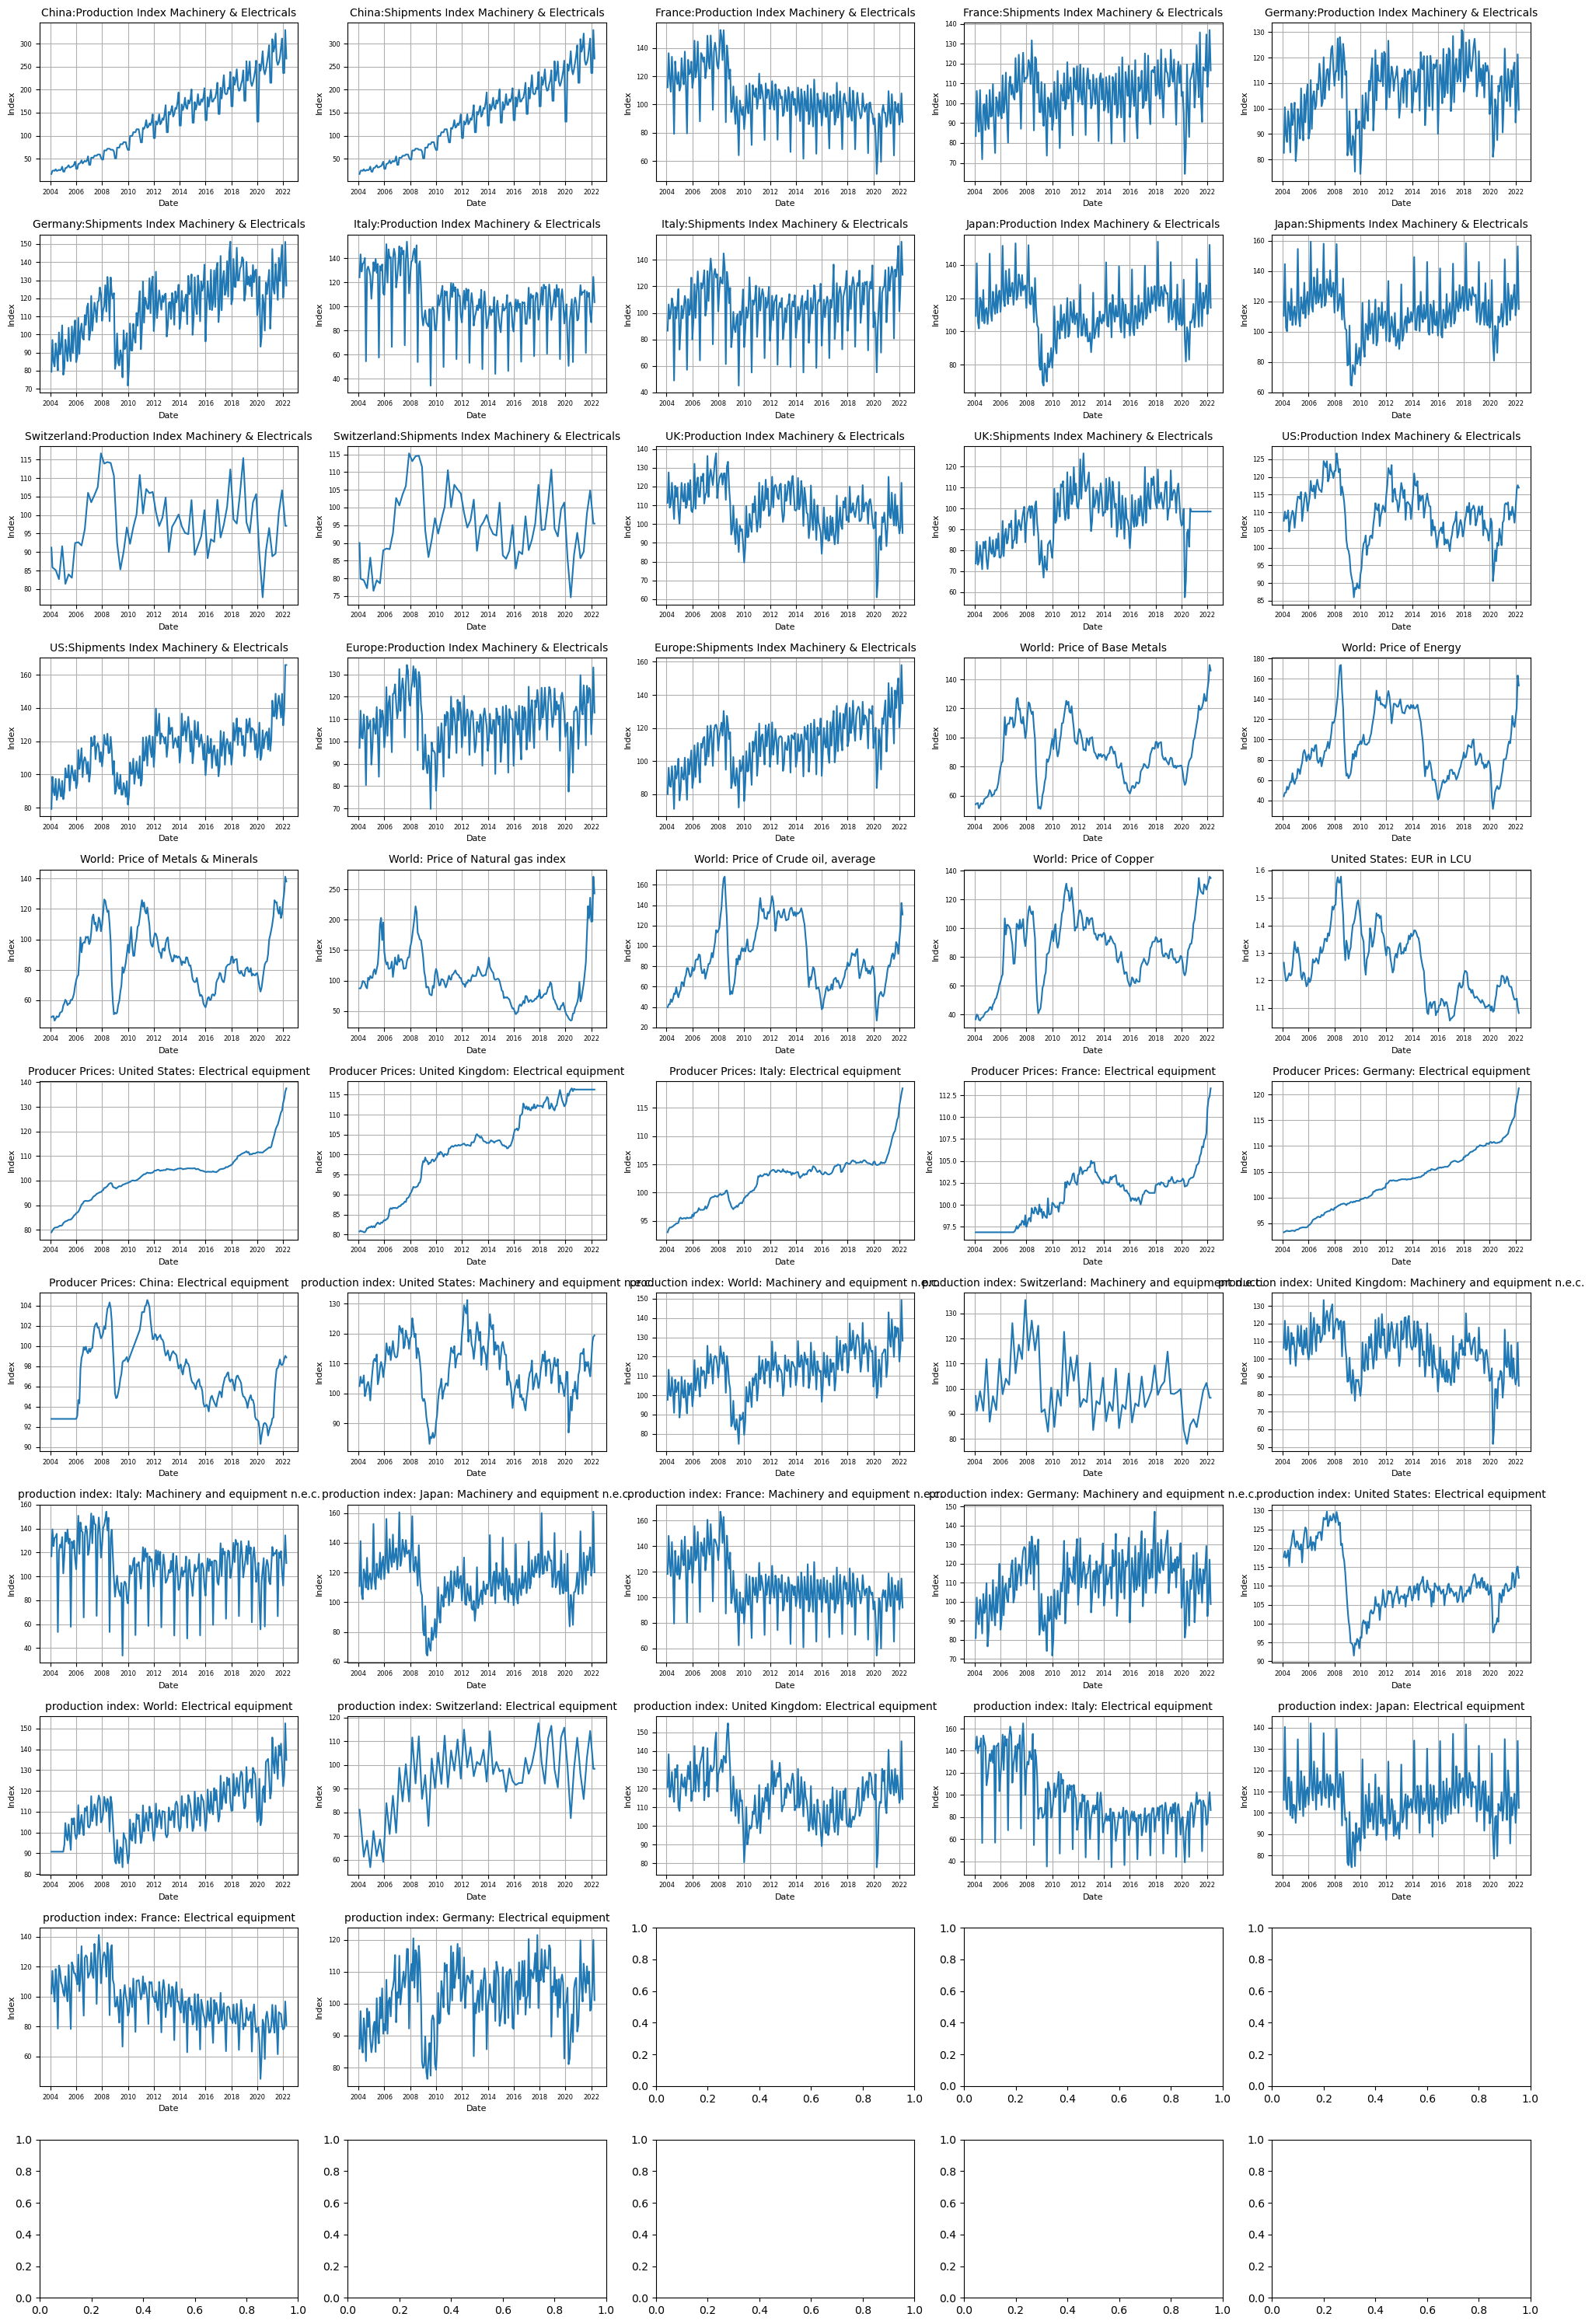

In [23]:
# Plotting
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(20, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(df_market.columns[1:]):  # Exclude the 'date' column
    ax = axes[i]
    ax.plot(df_market['date'], df_market[column])
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Date', fontsize=8)
    ax.set_ylabel('Index', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
df_sales

Mapped_GCK  Sales_EUR       date
0              1       0.00 2018-10-01
1              1       0.00 2018-10-02
2              1       0.00 2018-10-03
3              1       0.00 2018-10-04
4              1       0.00 2018-10-05
...          ...        ...        ...
9797          12       0.00 2019-08-23
9798          36    1015.00 2019-08-23
9799          12       0.00 2019-08-12
9800           8   43763.91 2019-08-28
9801           8       0.00 2019-08-27

[9802 rows x 3 columns]

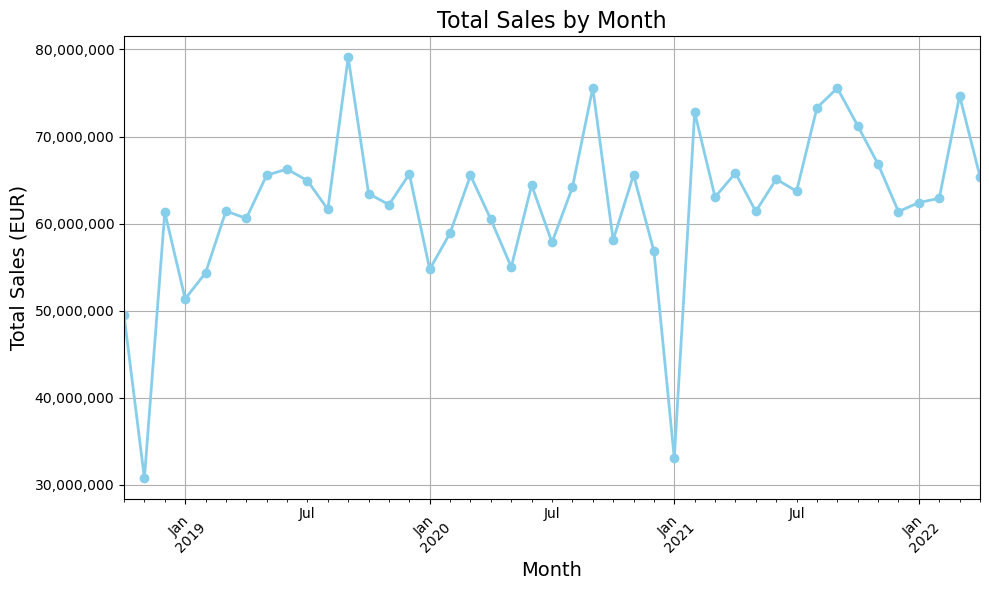

In [25]:
from matplotlib.ticker import FuncFormatter

# Group by month and sum the sales
monthly_sales = df_sales.resample('M', on='date')['Sales_EUR'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='skyblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (EUR)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)


# Format y-axis tick labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

In [26]:
monthly_sales

date
2018-10-31    49471370.83
2018-11-30    30760578.47
2018-12-31    61312068.79
2019-01-31    51360149.23
2019-02-28    54336933.67
2019-03-31    61435886.28
2019-04-30    60598035.44
2019-05-31    65563813.36
2019-06-30    66251932.08
2019-07-31    64925427.91
2019-08-31    61630019.14
2019-09-30    79087221.00
2019-10-31    63440758.36
2019-11-30    62168871.18
2019-12-31    65689212.91
2020-01-31    54752820.51
2020-02-29    58926297.86
2020-03-31    65532628.65
2020-04-30    60473324.95
2020-05-31    55001727.63
2020-06-30    64410726.64
2020-07-31    57838604.40
2020-08-31    64152808.89
2020-09-30    75588391.22
2020-10-31    58121991.70
2020-11-30    65603872.57
2020-12-31    56815684.33
2021-01-31    33057643.26
2021-02-28    72781252.24
2021-03-31    63055558.50
2021-04-30    65803190.42
2021-05-31    61399858.98
2021-06-30    65103351.13
2021-07-31    63716228.84
2021-08-31    73303028.73
2021-09-30    75559949.83
2021-10-31    71231256.10
2021-11-30    66824106.32
2021-12

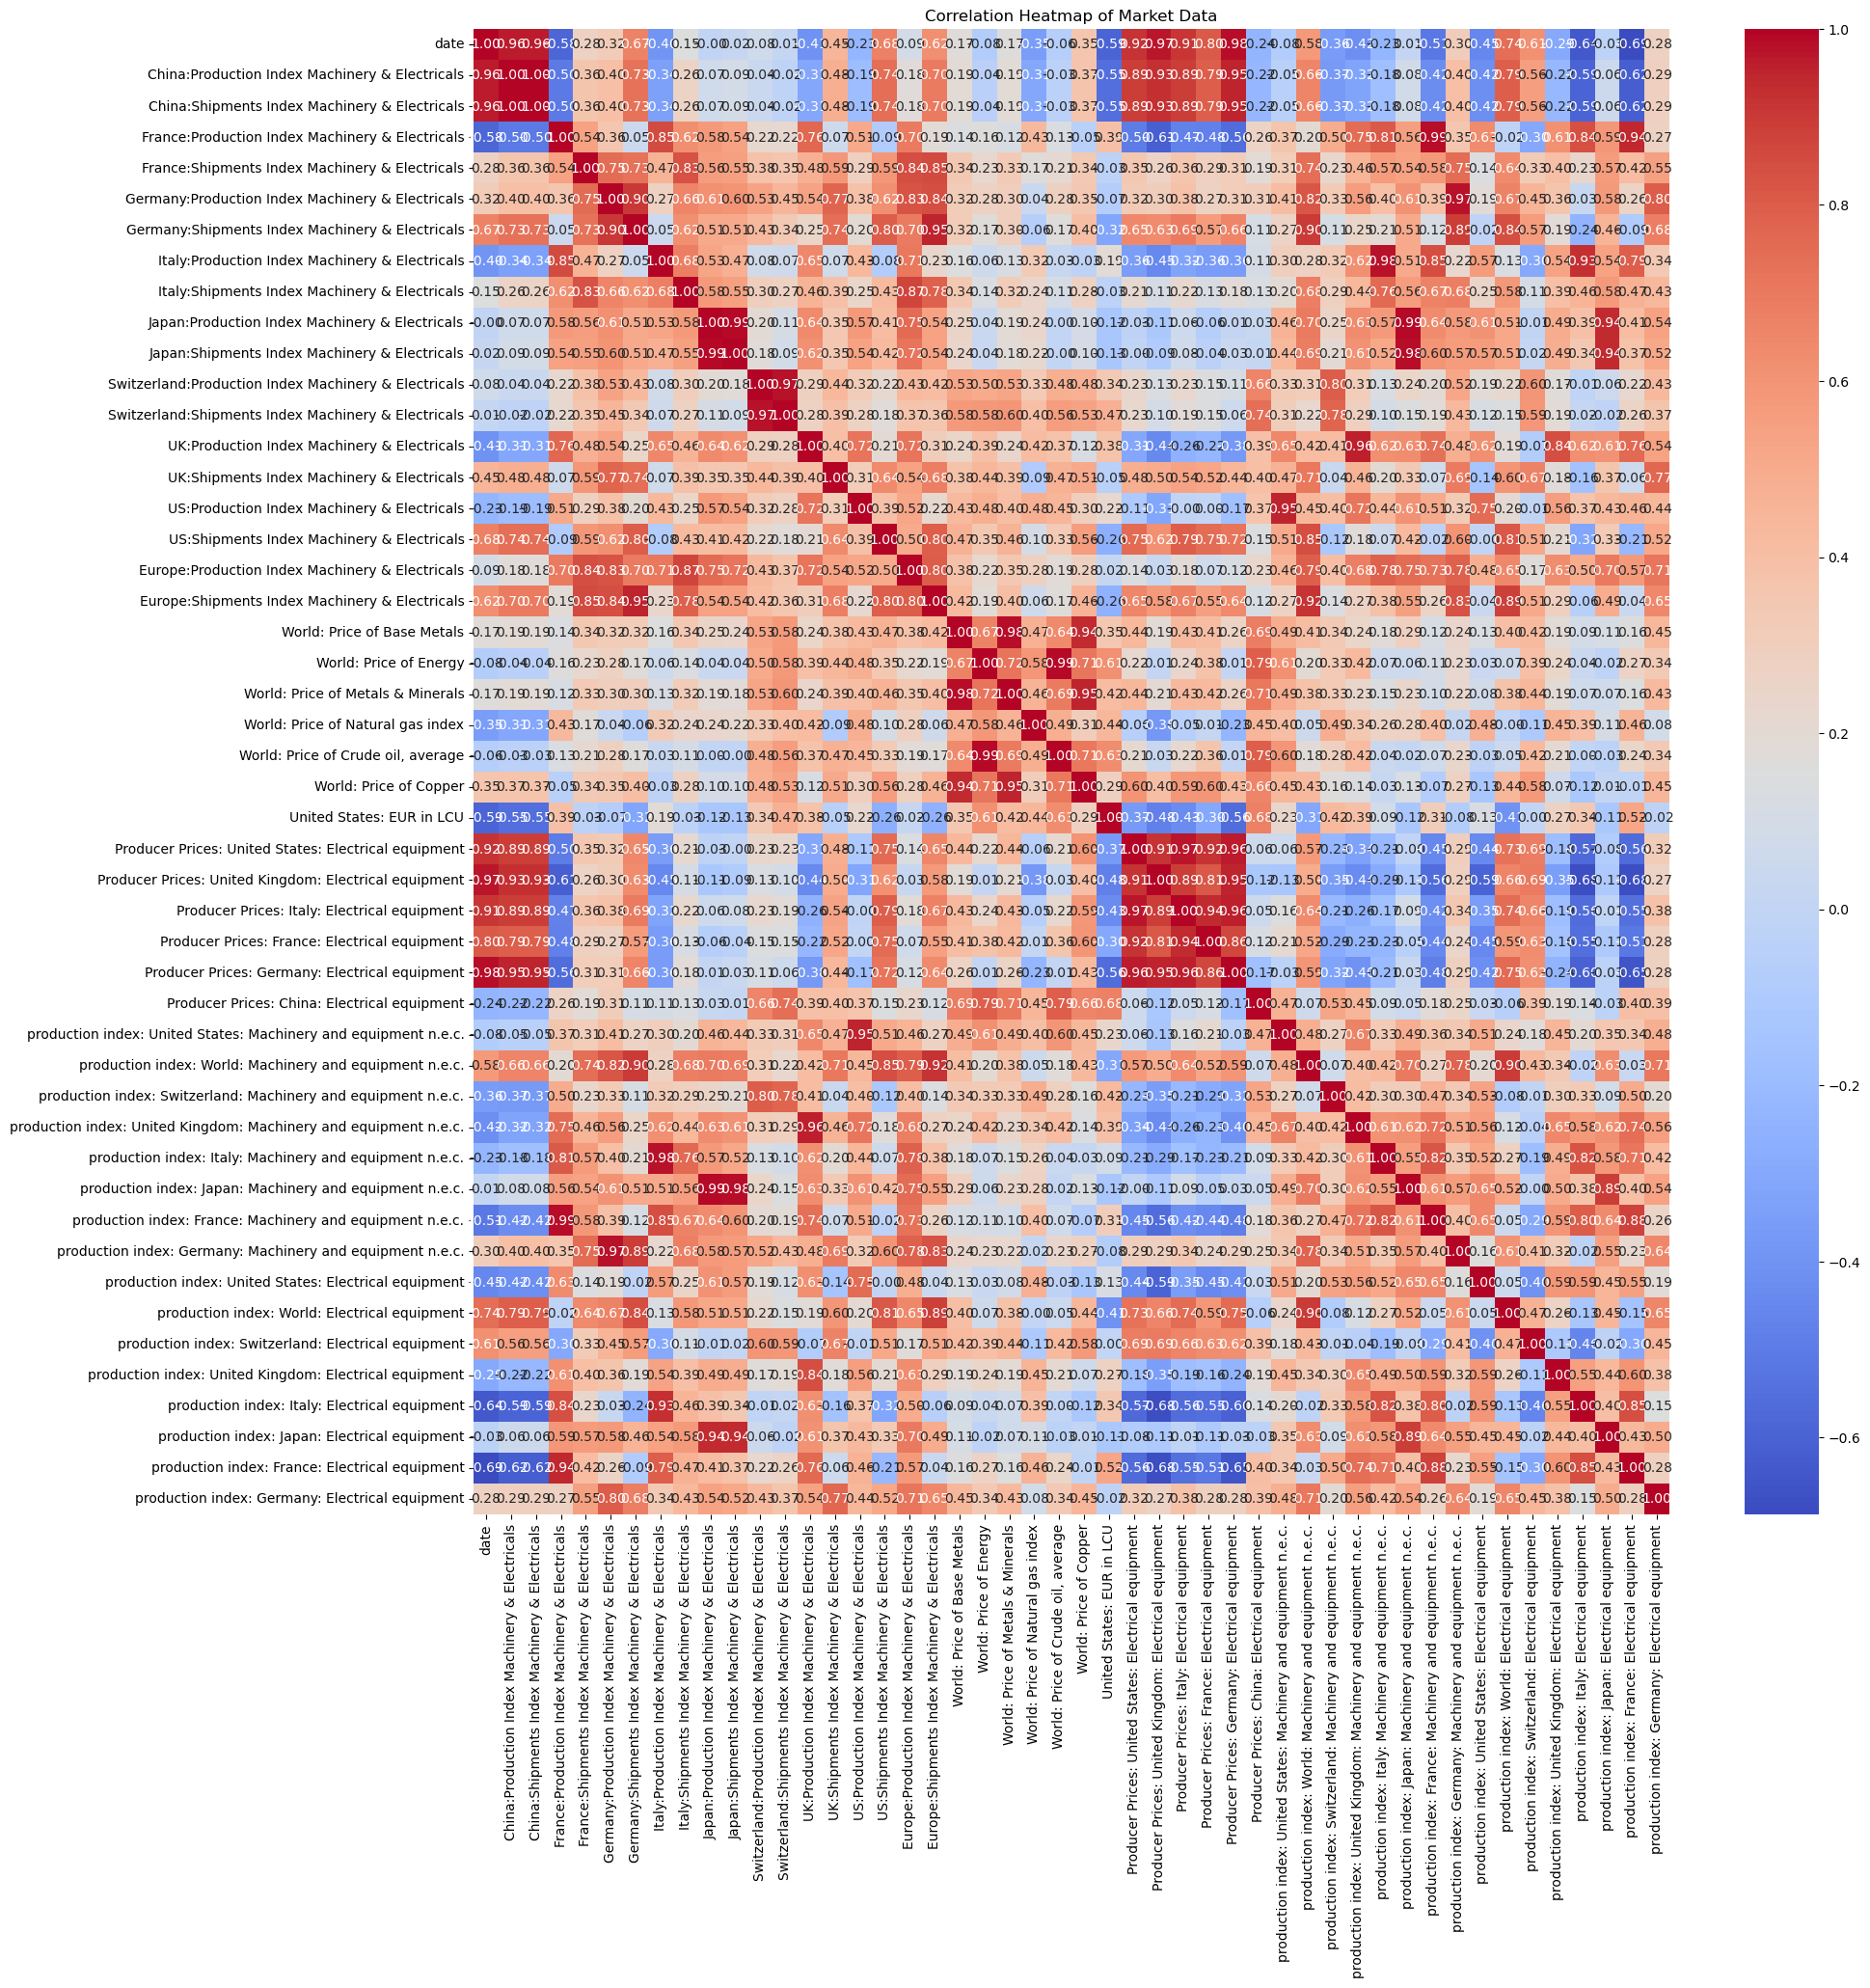

In [27]:
#Check for the correlation between the variables of market
plt.figure(figsize=(20, 20))
sns.heatmap(df_market.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Market Data')
plt.show()
#Analysis isn't that good with this visualization

In [28]:
#What pairs of features are highly correlated?
corr_matrix = df_market.corr().abs()

# Make a list with the pairs of highly correlated features
high_corr_var=np.where(corr_matrix>0.95)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]	
high_corr_var




[('date', 'China:Production Index Machinery & Electricals'),
 ('date', 'China:Shipments Index Machinery & Electricals'),
 ('date', 'Producer Prices: United Kingdom: Electrical equipment'),
 ('date', 'Producer Prices: Germany: Electrical equipment'),
 ('China:Production Index Machinery & Electricals',
  'China:Shipments Index Machinery & Electricals'),
 ('France:Production Index Machinery & Electricals',
  'production index: France: Machinery and equipment n.e.c.'),
 ('Germany:Production Index Machinery & Electricals',
  'production index: Germany: Machinery and equipment n.e.c.'),
 ('Italy:Production Index Machinery & Electricals',
  'production index: Italy: Machinery and equipment n.e.c.'),
 ('Japan:Production Index Machinery & Electricals',
  'Japan:Shipments Index Machinery & Electricals'),
 ('Japan:Production Index Machinery & Electricals',
  'production index: Japan: Machinery and equipment n.e.c.'),
 ('Japan:Shipments Index Machinery & Electricals',
  'production index: Japan: M

In [29]:
#features to remove
#For simplification, we will remove some highly correlated features and we will keep only the ones that make more sense for analysis
to_drop = ['China:Shipments Index Machinery & Electricals',
           'production index: France: Machinery and equipment n.e.c.',
           'production index: Germany: Machinery and equipment n.e.c.',
           'production index: Italy: Machinery and equipment n.e.c.',
           'Japan:Shipments Index Machinery & Electricals',
           'production index: Japan: Machinery and equipment n.e.c.',
           'Switzerland:Shipments Index Machinery & Electricals',
           'production index: United Kingdom: Machinery and equipment n.e.c.',
           'production index: United States: Machinery and equipment n.e.c.',
           'World: Price of Base Metals',
           'World: Price of Crude oil, average',
           'World: Price of Copper',
           'Producer Prices: United States: Electrical equipment',
           'Producer Prices: Italy: Electrical equipment',
           'Producer Prices: United Kingdom: Electrical equipment'
]

df_market = df_market.drop(to_drop, axis=1)

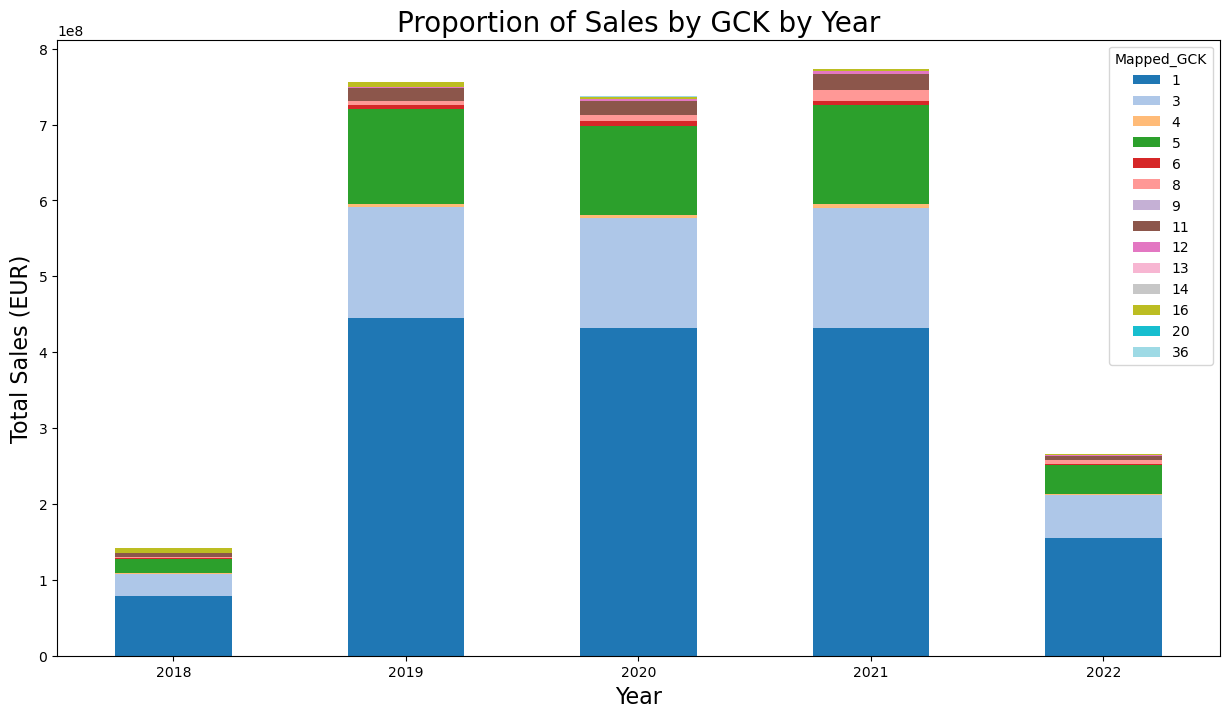

In [30]:
#plot the proportion of sales by GCK by year with a stacked bar chart
df_sales['year'] = df_sales['date'].dt.year # Extract the year from the date
df_sales['month'] = df_sales['date'].dt.month   # Extract the month from the date

df_sales_grouped = df_sales.groupby(['year', 'Mapped_GCK'])['Sales_EUR'].sum().reset_index() # Group by year and GCK and sum the sales

df_sales_pivot = df_sales_grouped.pivot(index='year', columns='Mapped_GCK', values='Sales_EUR').fillna(0) # Pivot the table

df_sales_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Proportion of Sales by GCK by Year', size=20) 
plt.xlabel('Year', size=16)
plt.ylabel('Total Sales (EUR)', size=16)
plt.xticks(rotation=0)
plt.show()


In [31]:
#Make a table with the proportion of sales by GCK by year
df_sales_pivot['total'] = df_sales_pivot.sum(axis=1) # Calculate the total sales for each year
df_sales_pivot_percentage = df_sales_pivot.div(df_sales_pivot['total'], axis=0) * 100 # Calculate the percentage of sales for each GCK
df_sales_pivot_percentage = df_sales_pivot_percentage.drop('total', axis=1) # Drop the total column

df_sales_pivot_percentage


Mapped_GCK          1          3         4          5         6         8  \
year                                                                        
2018        55.904370  20.268837  0.847216  13.028112  1.301186  0.977672   
2019        58.780406  19.329262  0.579291  16.492491  0.774742  0.723716   
2020        58.660206  19.655452  0.520352  15.931561  0.837373  1.094648   
2021        55.928785  20.419807  0.643064  16.801388  0.720044  1.847574   
2022        58.597595  21.003088  0.466262  14.707145  0.451643  2.131616   

Mapped_GCK         9        11        12        13        14        16  \
year                                                                     
2018        0.003600  2.929315  0.033655  0.078775  0.016179  4.573429   
2019        0.011951  2.153375  0.171934  0.044600  0.019608  0.897985   
2020        0.010934  2.545894  0.311301  0.028489  0.015465  0.339220   
2021        0.015731  2.750323  0.472668  0.032286  0.019840  0.291551   
2022        0.004033  2.046260  0.369843  0.037904  0.020791  0.139239   

Mapped_GCK        20        36  
year                            
2018        0.007969  0.029685  
2019        0.001978  0.018662  
2020        0.003637  0.045469  
2021        0.002007  0.054932  
2022        0.003676  0.020905

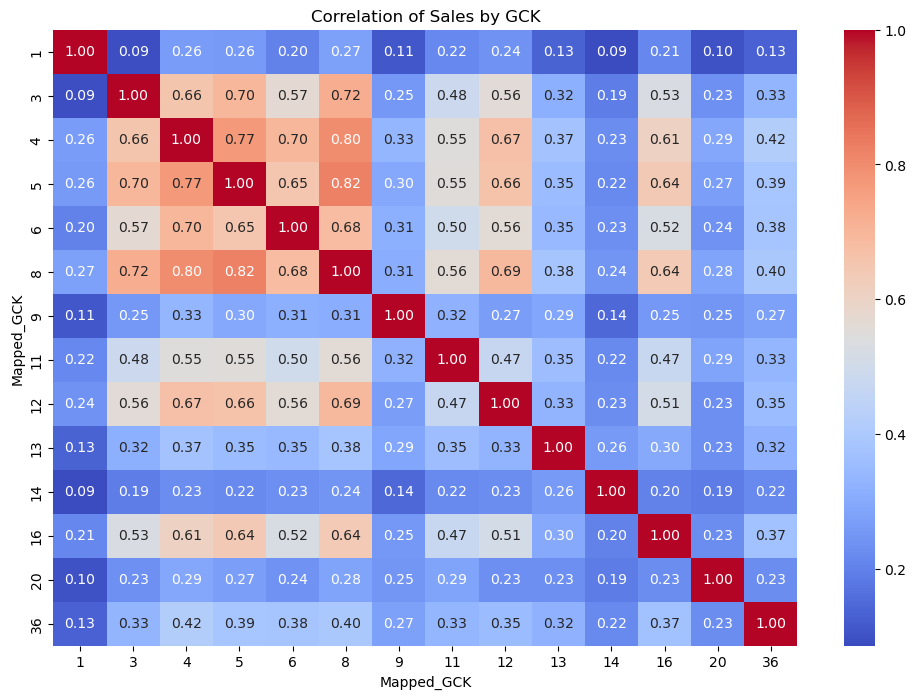

In [32]:
#See which products are sold together
df_sales_corr = df_sales.groupby('date')['Mapped_GCK'].value_counts().unstack().fillna(0) # Group by date and GCK, then unstack to get a count of each GCK per date
df_sales_corr = df_sales_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_sales_corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation of Sales by GCK')
plt.show()

In [33]:
#What are the ones above 0.7
df_sales_corr[df_sales_corr > 0.7]

#Make a list of these values
gck_pairs = []
for column in df_sales_corr.columns:
    gck_pairs.extend([(column, gck) for gck in df_sales_corr.index[df_sales_corr[column] > 0.7]])

#Remove values that are paired with themselves
gck_pairs = [(a, b) for a, b in gck_pairs if a != b]

#Get only the unique pairs
gck_pairs = list(set([tuple(sorted(pair)) for pair in gck_pairs]))

gck_pairs




[(4, 5), (3, 8), (4, 8), (5, 8)]

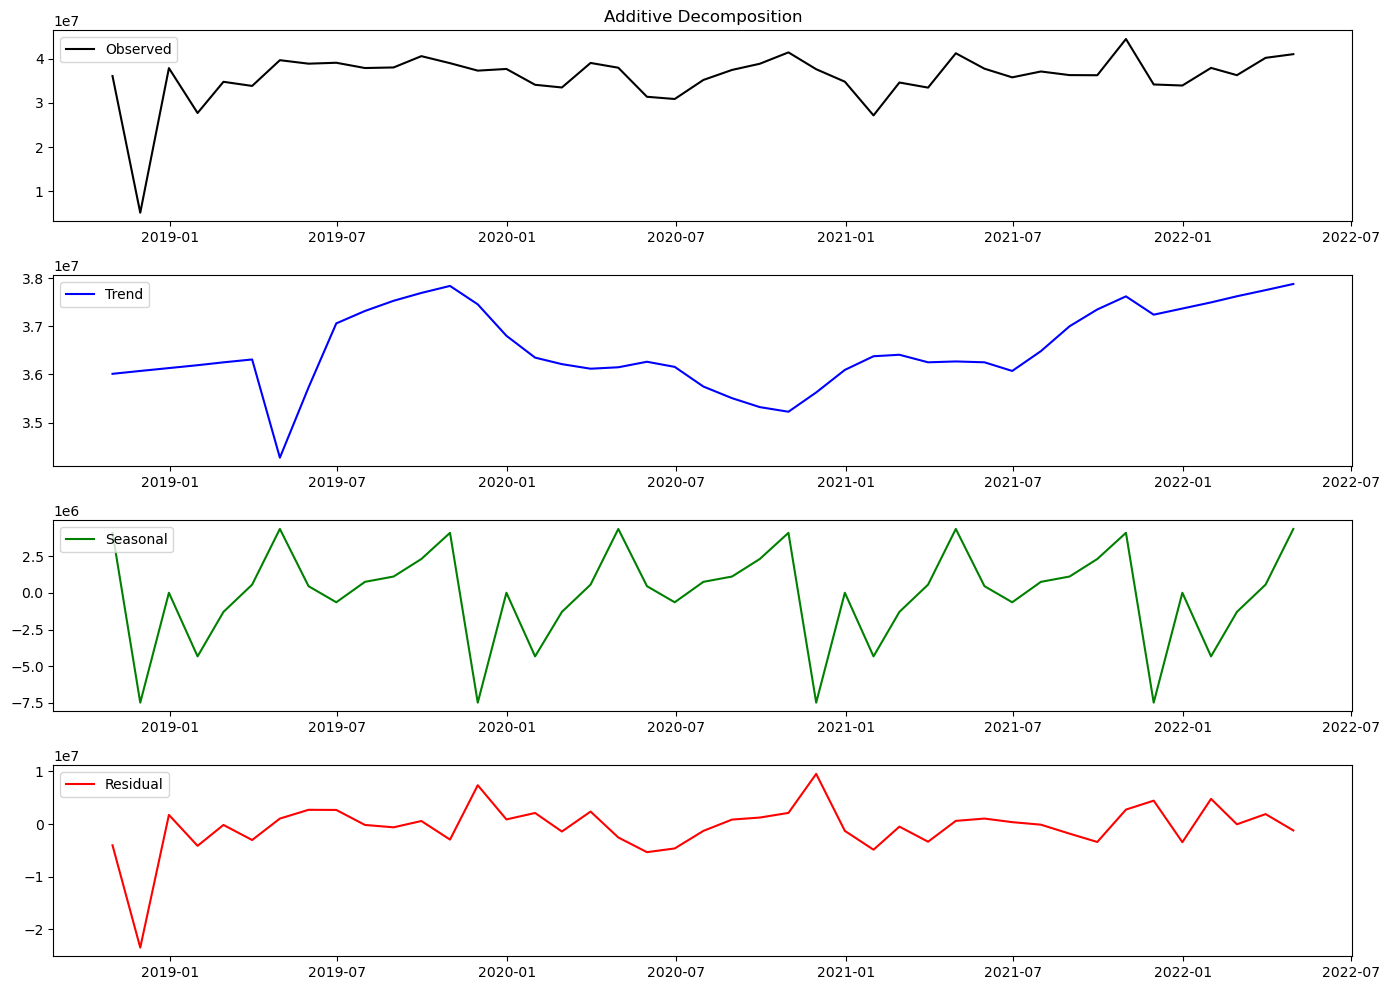

In [34]:
#PLOT THE ADDITIVE DECOMPOSITION OF THE GCK 1  SALES
# Filter the data for GCK 1
df_sales_gck1 = df_sales[df_sales['Mapped_GCK'] == 1]

# Resample the data to monthly frequency
df_sales_gck1_monthly = df_sales_gck1.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck1_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


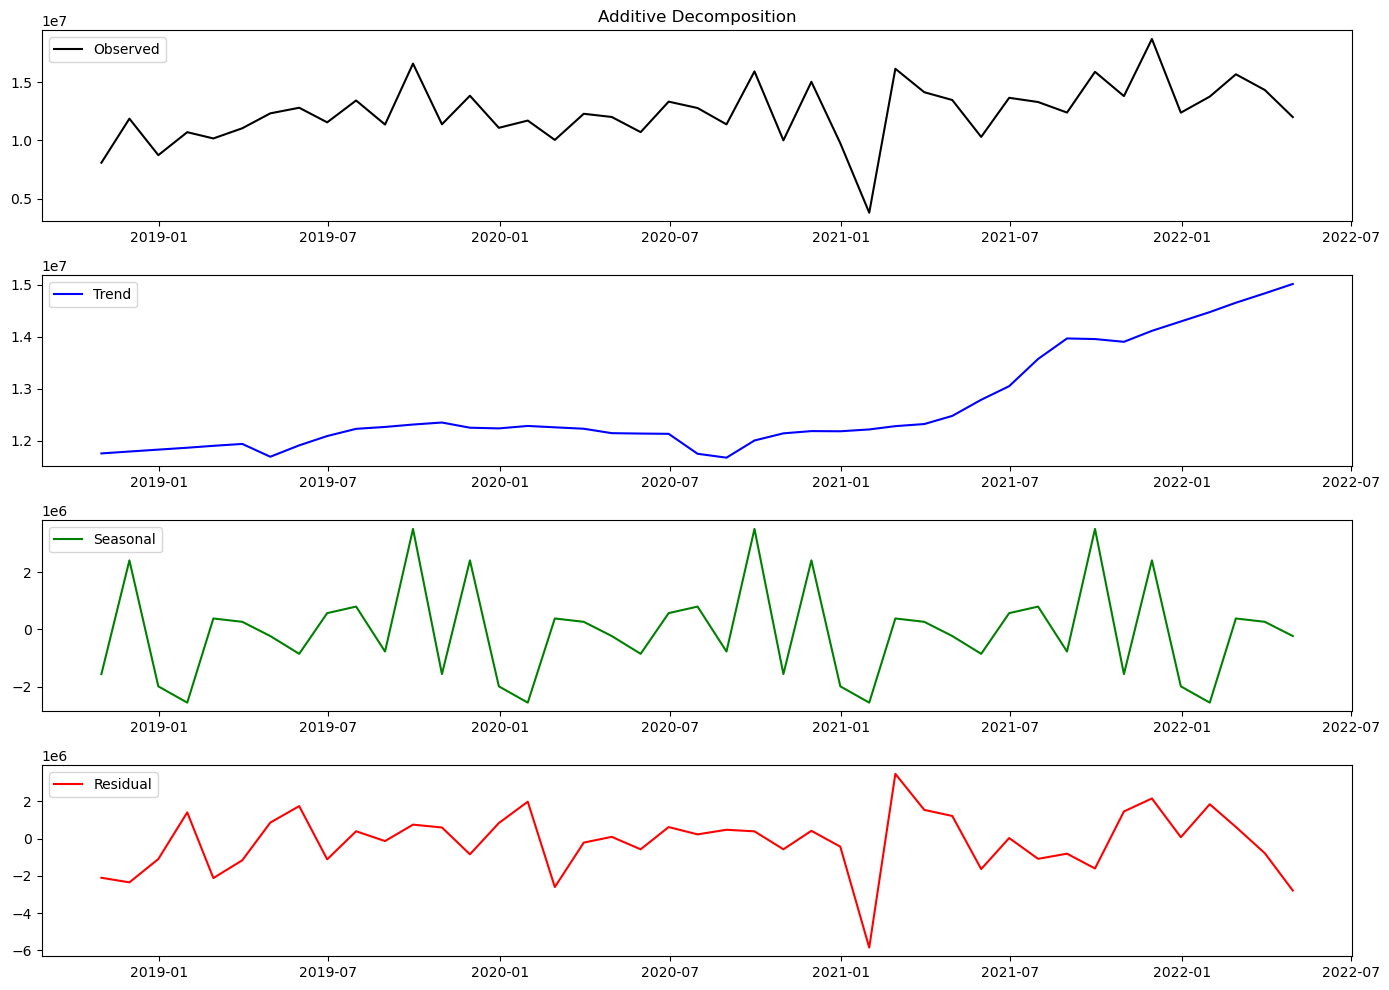

In [35]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 3 SALES
# Filter the data for GCK 3
df_sales_gck3 = df_sales[df_sales['Mapped_GCK'] == 3]

# Resample the data to monthly frequency
df_sales_gck3_monthly = df_sales_gck3.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck3_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



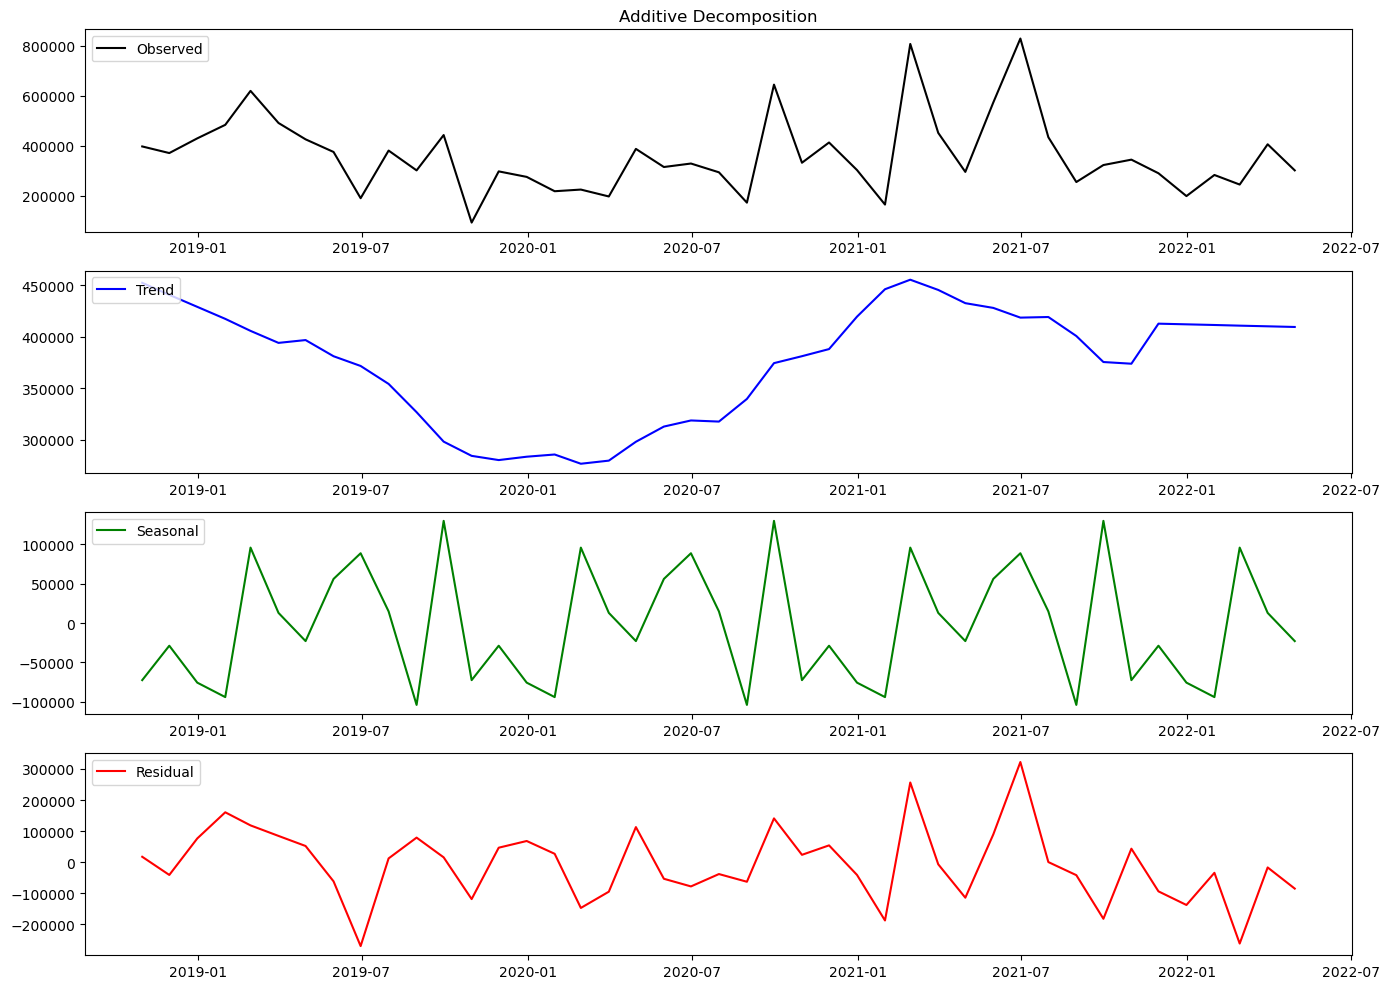

In [36]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 4  SALES
# Filter the data for GCK 4
df_sales_gck4 = df_sales[df_sales['Mapped_GCK'] == 4]

# Resample the data to monthly frequency
df_sales_gck4_monthly = df_sales_gck4.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck4_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



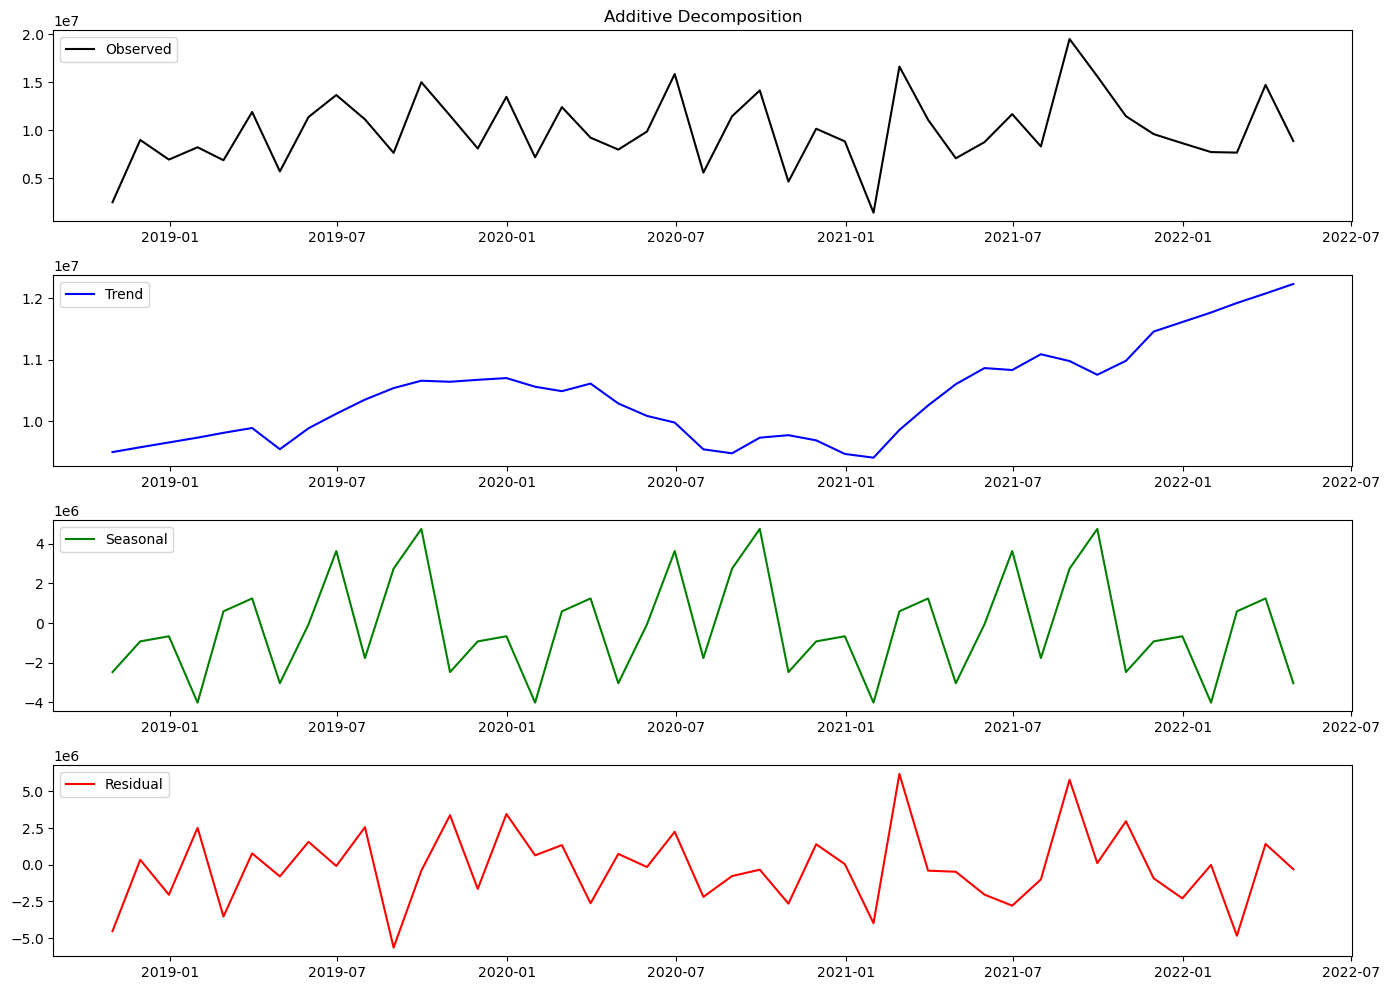

In [37]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 5  SALES
# Filter the data for GCK 5
df_sales_gck5 = df_sales[df_sales['Mapped_GCK'] == 5]

# Resample the data to monthly frequency
df_sales_gck5_monthly = df_sales_gck5.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck5_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



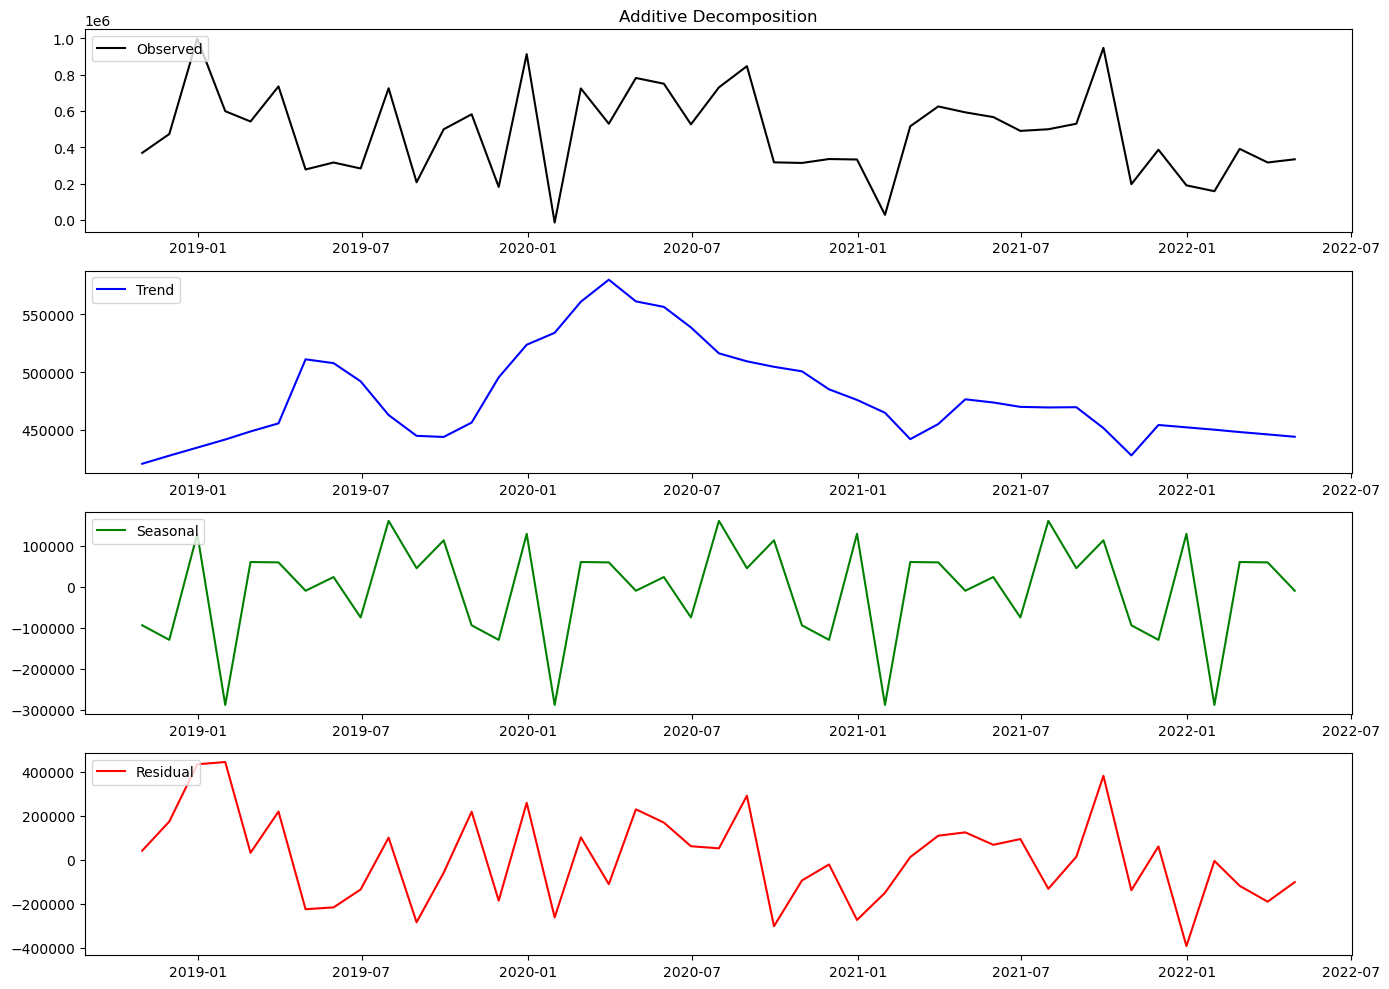

In [38]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 6  SALES
# Filter the data for GCK 6
df_sales_gck6 = df_sales[df_sales['Mapped_GCK'] == 6]

# Resample the data to monthly frequency
df_sales_gck6_monthly = df_sales_gck6.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck6_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



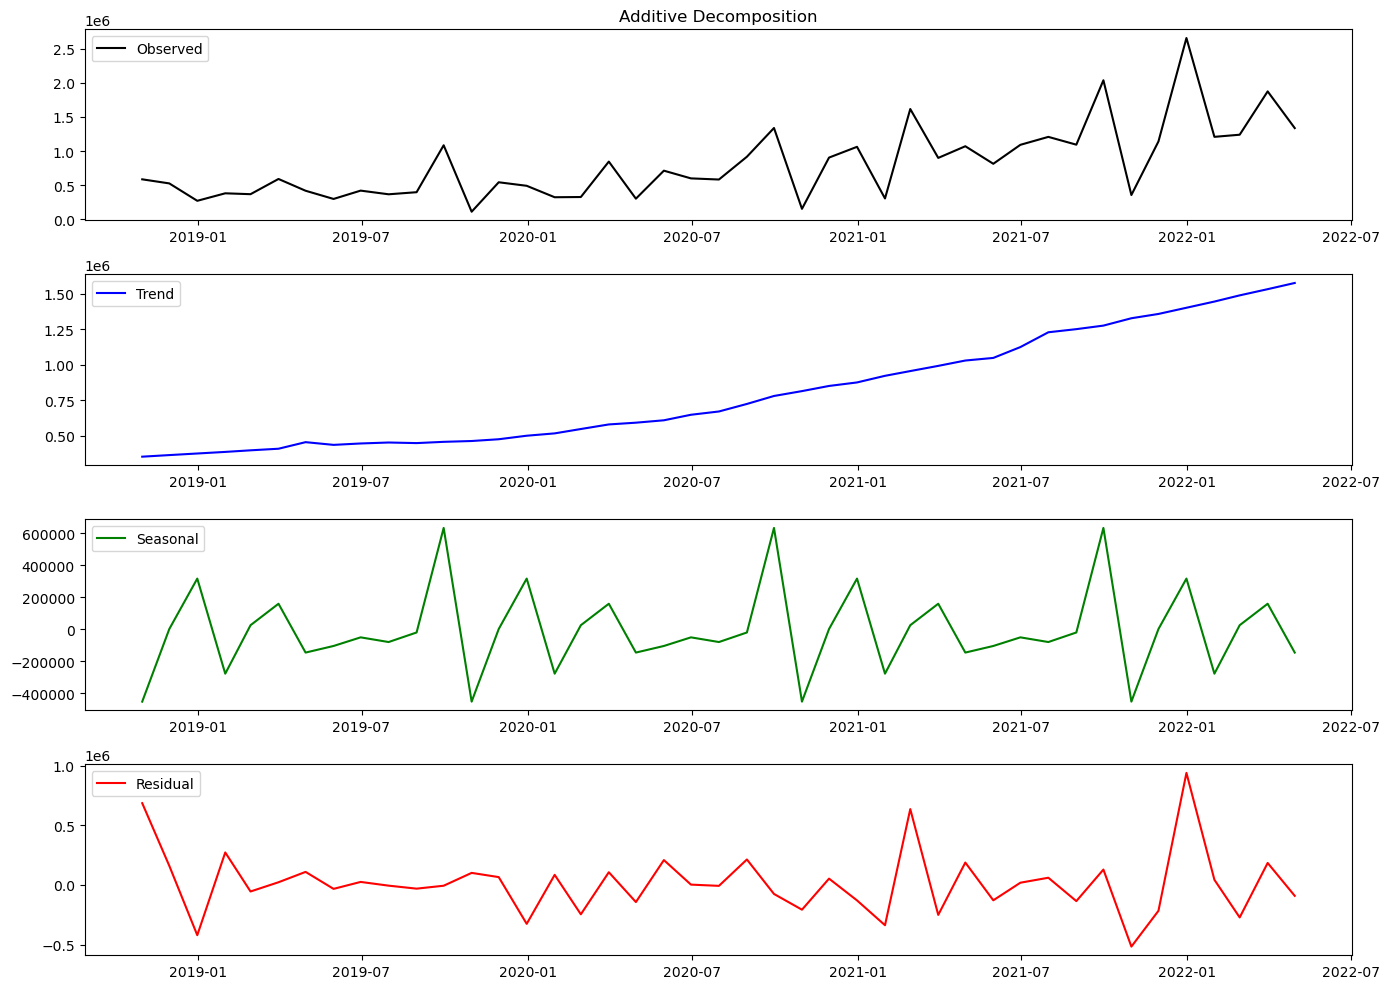

In [39]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 8  SALES
# Filter the data for GCK 8
df_sales_gck8 = df_sales[df_sales['Mapped_GCK'] == 8]

# Resample the data to monthly frequency
df_sales_gck8_monthly = df_sales_gck8.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck8_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



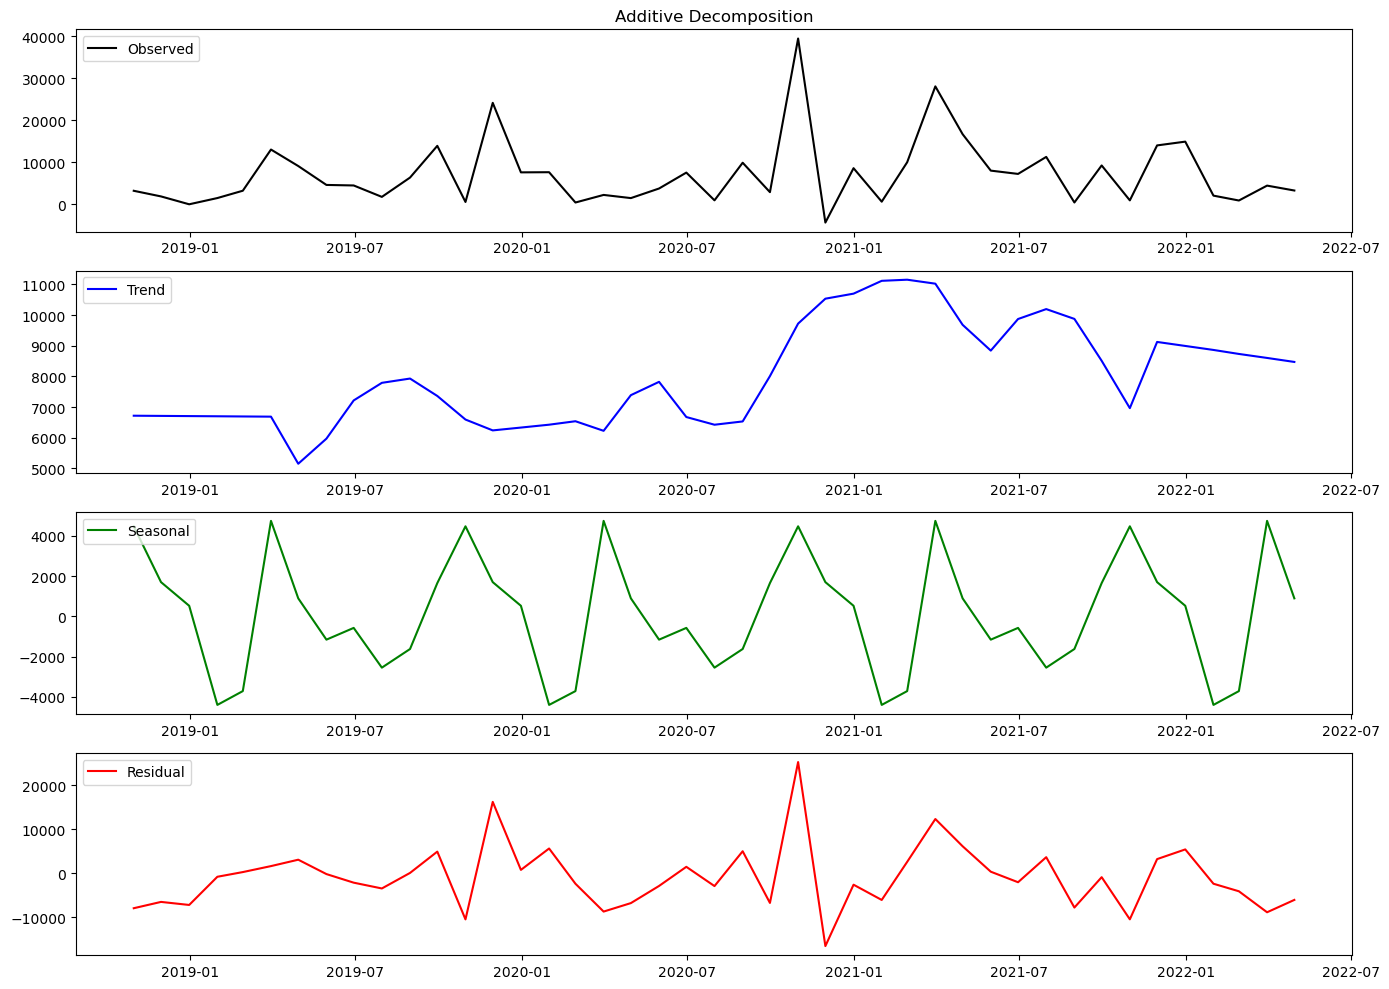

In [40]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 9  SALES
# Filter the data for GCK 9
df_sales_gck9 = df_sales[df_sales['Mapped_GCK'] == 9]

# Resample the data to monthly frequency
df_sales_gck9_monthly = df_sales_gck9.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck9_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



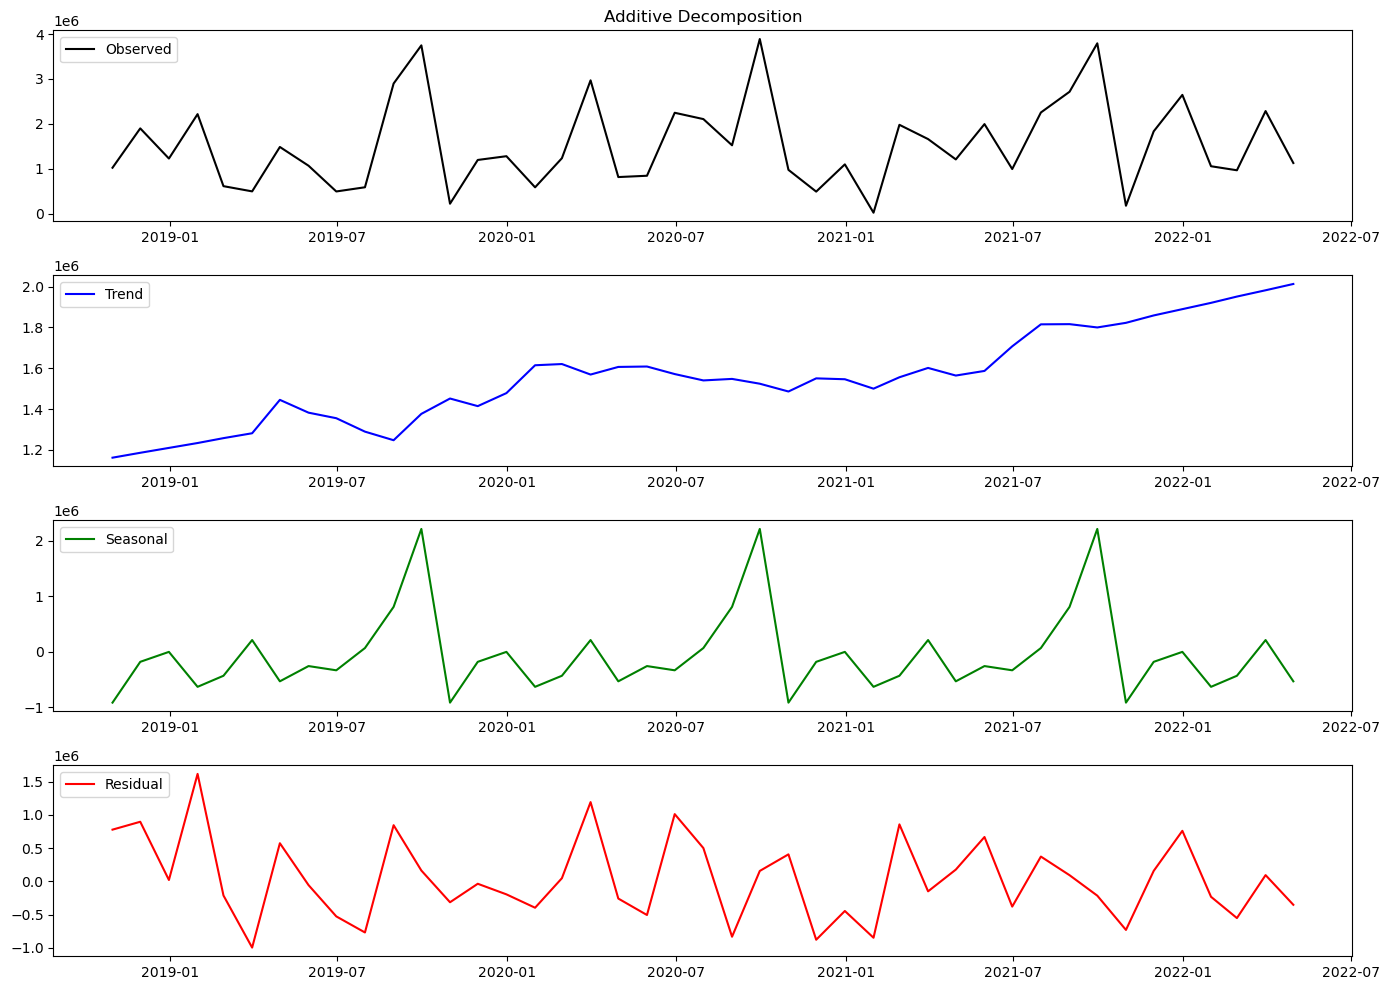

In [41]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 11  SALES
# Filter the data for GCK 11
df_sales_gck11 = df_sales[df_sales['Mapped_GCK'] == 11]

# Resample the data to monthly frequency
df_sales_gck11_monthly = df_sales_gck11.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck11_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



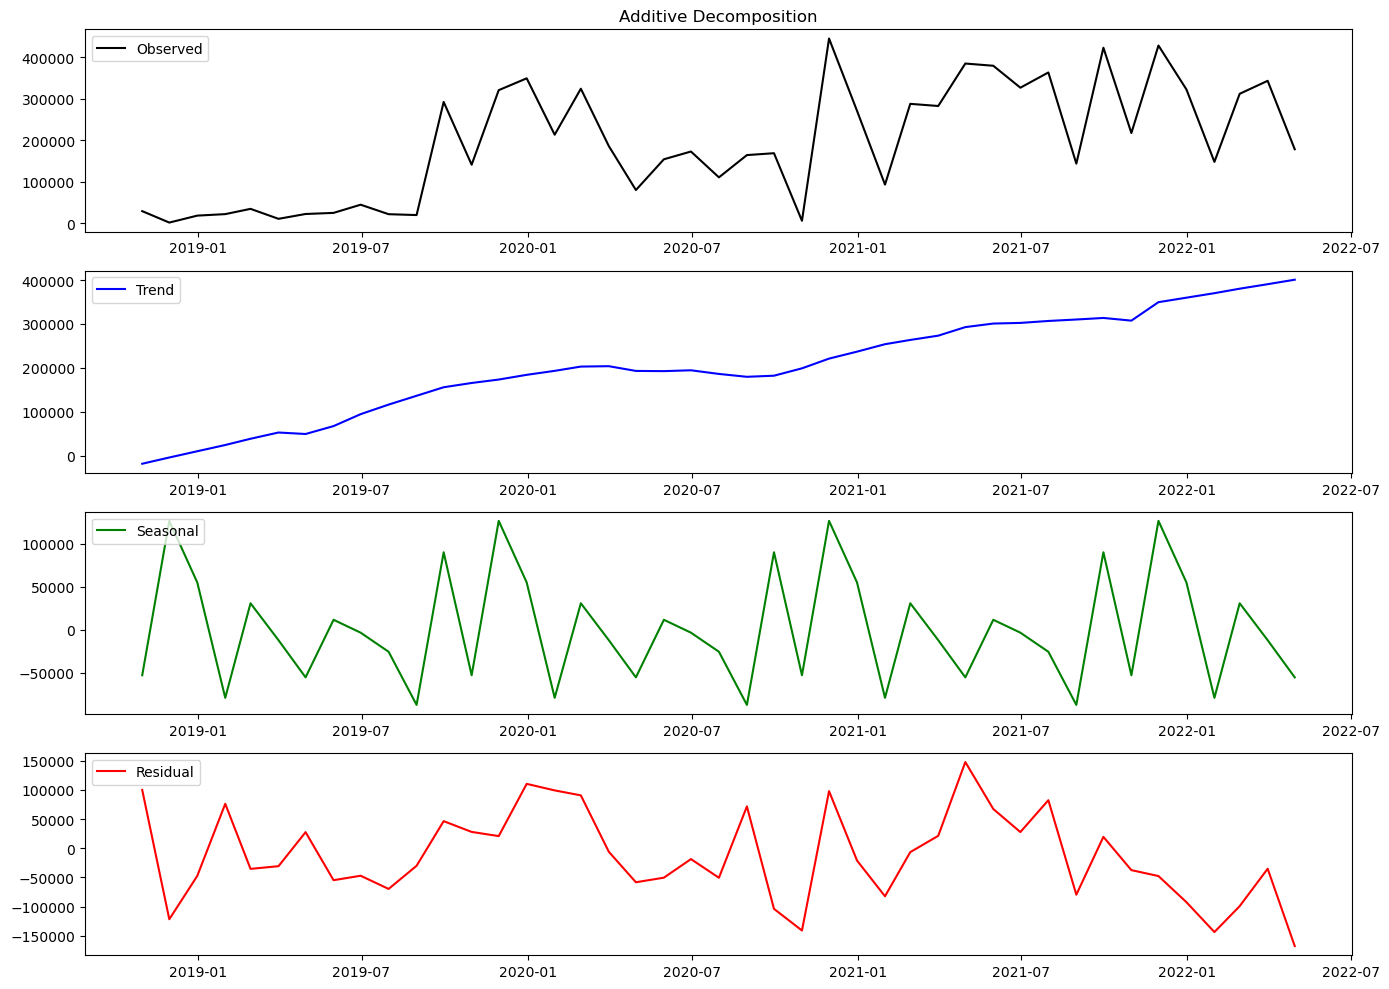

In [42]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 12  SALES
# Filter the data for GCK 12
df_sales_gck12 = df_sales[df_sales['Mapped_GCK'] == 12]

# Resample the data to monthly frequency
df_sales_gck12_monthly = df_sales_gck12.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck12_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')



plt.tight_layout()
plt.show()



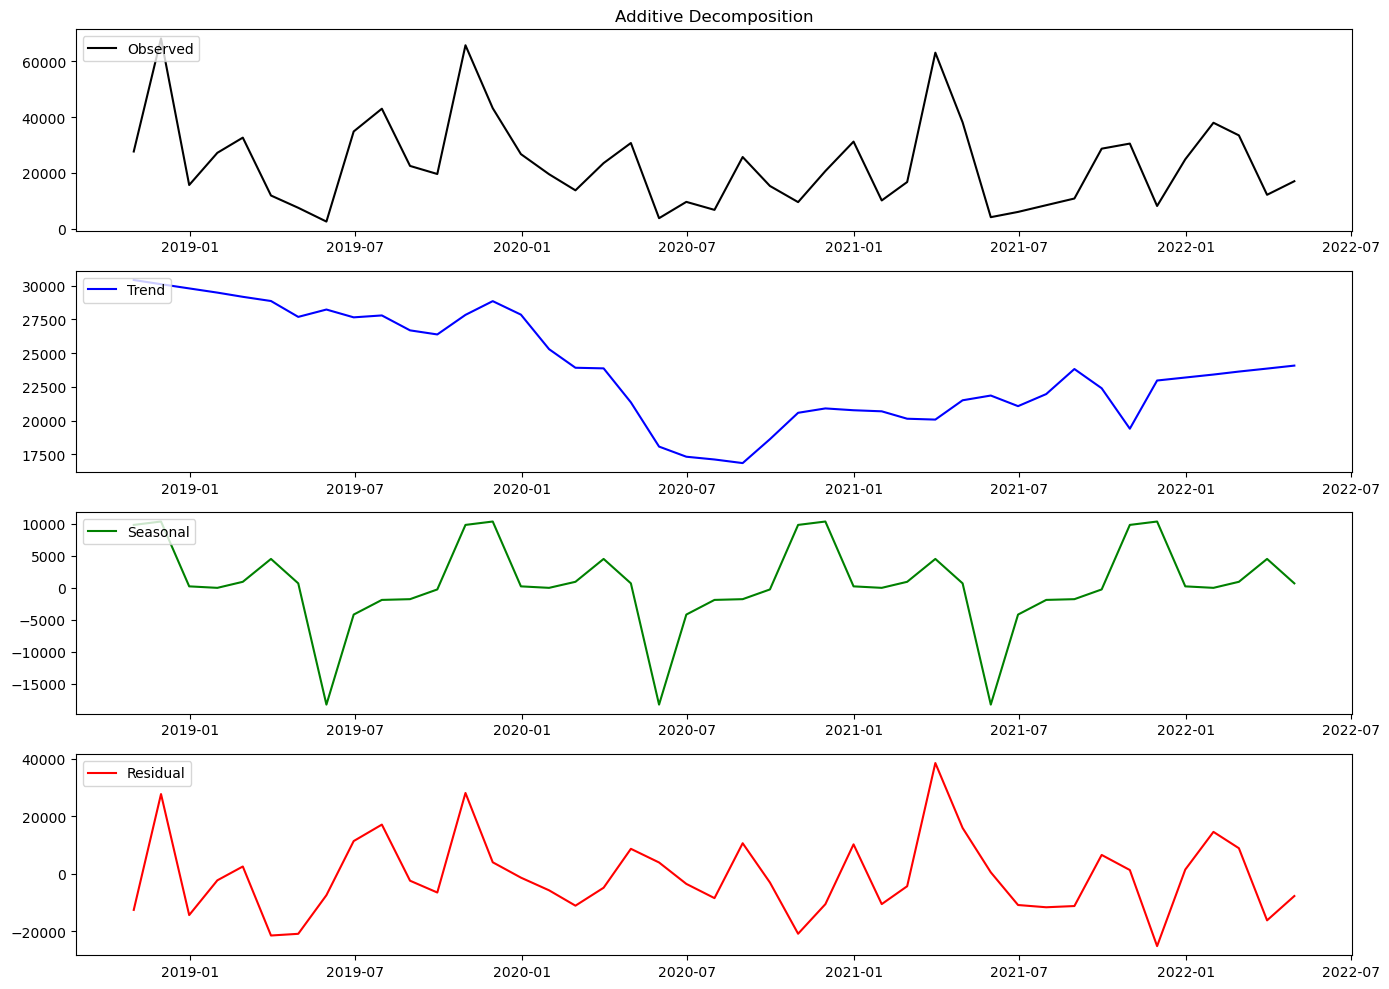

In [43]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 13  SALES
# Filter the data for GCK 13
df_sales_gck13 = df_sales[df_sales['Mapped_GCK'] == 13]

# Resample the data to monthly frequency
df_sales_gck13_monthly = df_sales_gck13.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck13_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



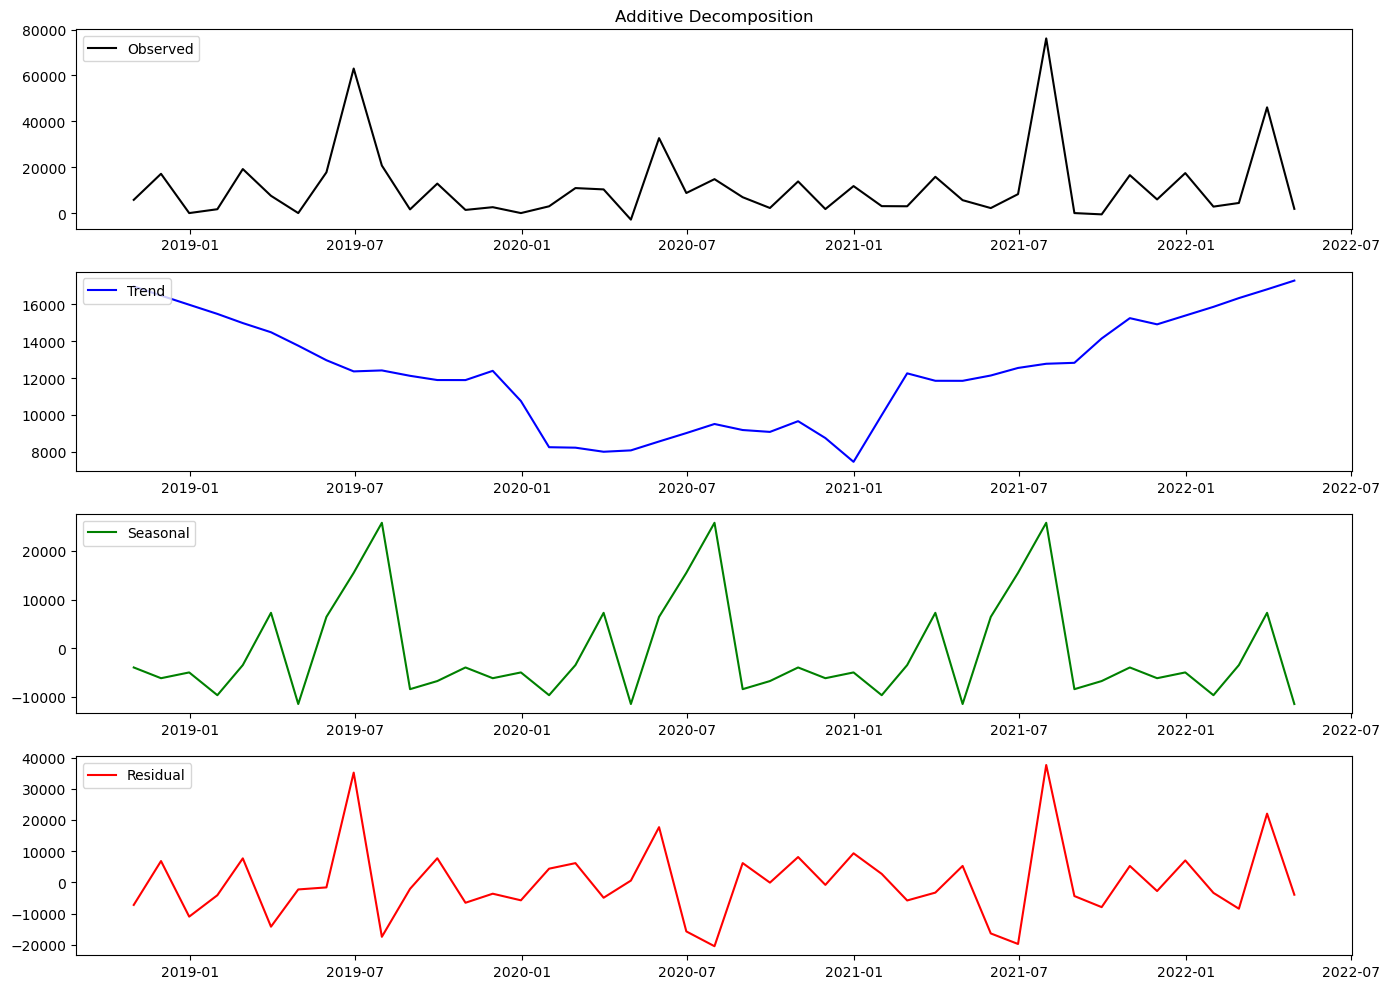

In [44]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 14  SALES
# Filter the data for GCK 14
df_sales_gck14 = df_sales[df_sales['Mapped_GCK'] == 14]

# Resample the data to monthly frequency
df_sales_gck14_monthly = df_sales_gck14.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck14_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



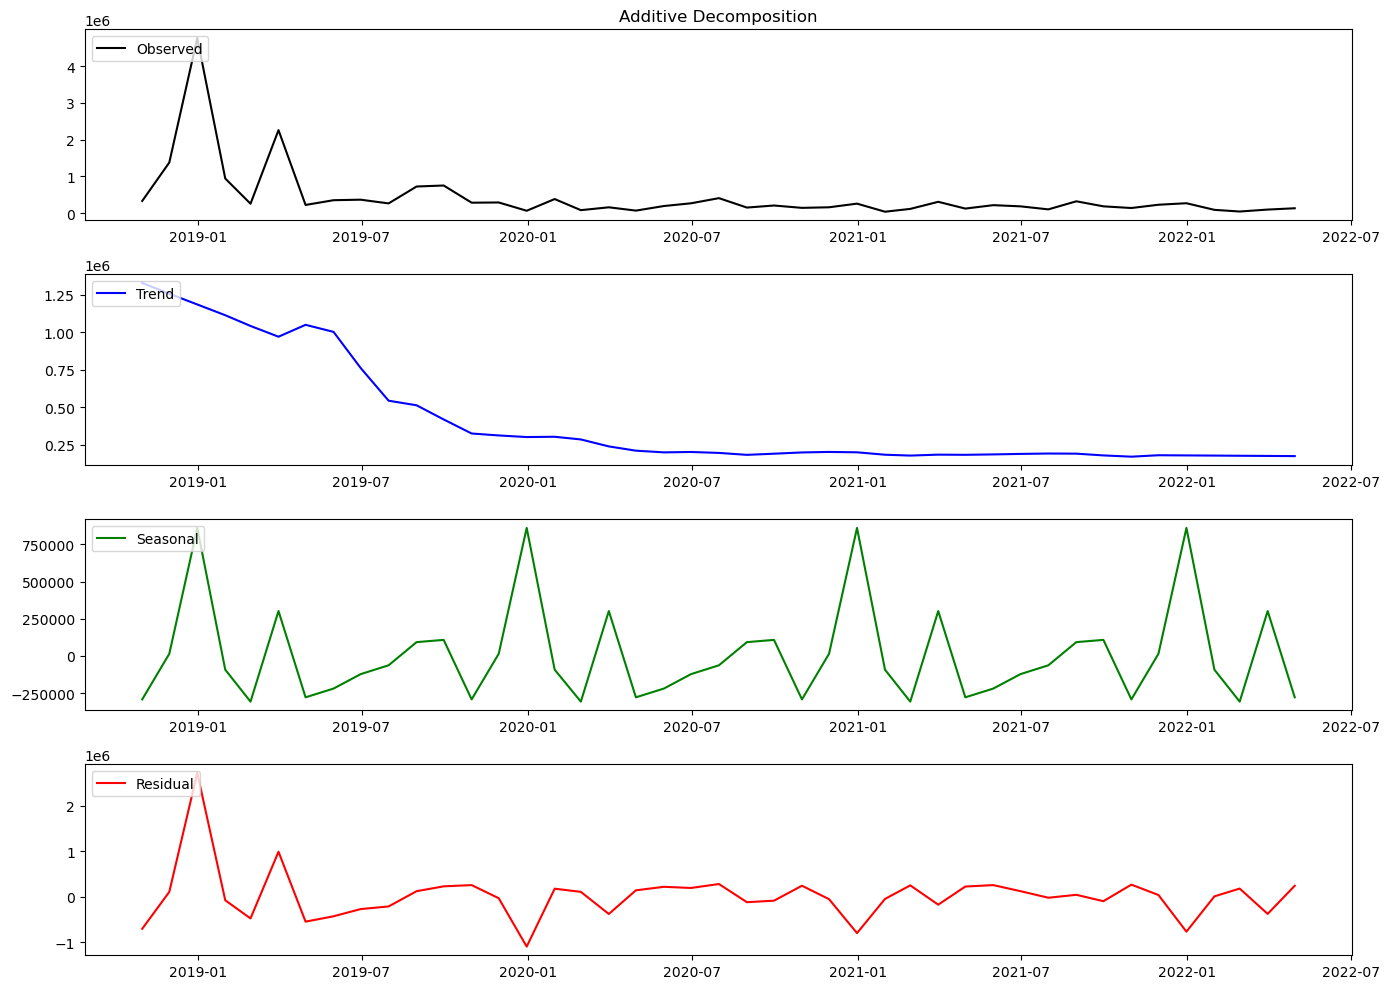

In [45]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 16  SALES
# Filter the data for GCK 16
df_sales_gck16 = df_sales[df_sales['Mapped_GCK'] == 16]

# Resample the data to monthly frequency
df_sales_gck16_monthly = df_sales_gck16.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck16_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



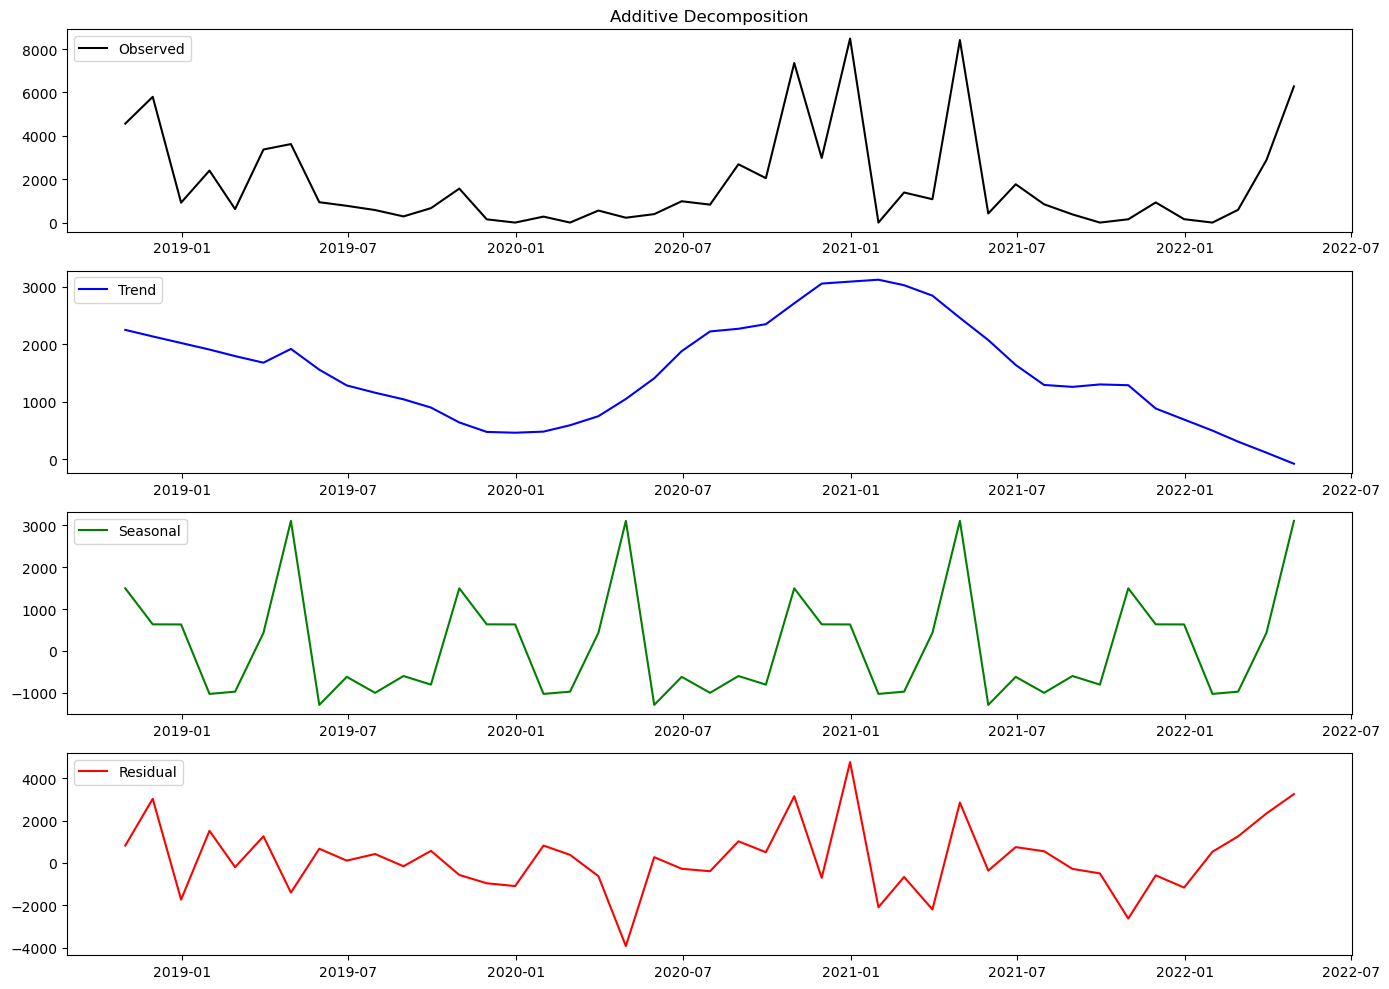

In [46]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 20  SALES
# Filter the data for GCK 20
df_sales_gck20 = df_sales[df_sales['Mapped_GCK'] == 20]

# Resample the data to monthly frequency
df_sales_gck20_monthly = df_sales_gck20.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck20_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



In [47]:
#PLOT THE ADDITIVE AND MULTIPLICATIVE DECOMPOSITION OF THE GCK 36  SALES
# Filter the data for GCK 36
df_sales_gck36 = df_sales[df_sales['Mapped_GCK'] == 36]

# Resample the data to monthly frequency
df_sales_gck36_monthly = df_sales_gck36.resample('M', on='date')['Sales_EUR'].sum()

# Perform additive decomposition
decomposition_add = seasonal_decompose(df_sales_gck36_monthly, model='additive', extrapolate_trend='freq')

# Plot the additive decompositions
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_add.observed, label='Observed', color='black')
plt.legend(loc='upper left')
plt.title('Additive Decomposition')

plt.subplot(4, 1, 2)
plt.plot(decomposition_add.trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

#plot the residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
#Make a table that makes a trend summary for each GCK
trend_summary = pd.DataFrame()

for gck in df_sales['Mapped_GCK'].unique():
    df_sales_gck = df_sales[df_sales['Mapped_GCK'] == gck]
    df_sales_gck_monthly = df_sales_gck.resample('M', on='date')['Sales_EUR'].sum()
    
    # Add a small constant value to avoid zero and negative values
    df_sales_gck_monthly = df_sales_gck_monthly + 0.01
    
    decomposition = seasonal_decompose(df_sales_gck_monthly, model='additative', extrapolate_trend='freq')
    
    trend_summary.loc[gck, 'Trend'] = 'Positve' if decomposition.trend.iloc[-1] > decomposition.trend.iloc[0] else 'Negative'
    trend_summary.loc[gck, 'Trend Change'] = decomposition.trend.iloc[-1] - decomposition.trend.iloc[0]

trend_summary


Based on additive decomposition of sales we can evaluate:
- GCK1 has a stable amount of sales across time, and even though it has a positive trend change.
- GCK3 has a more visible seasonality, as we can observe that there is a peak of sales befere the end of every year. We can also visualise a positive trend of sales across time.
- GCK4 has a weirdly distributed sales pattern. Is displays most sales after july, and before the end of the year like other products in 2019 and 2020. In this period it had a downwards trend of sales, that beggan rising in the second quarter of 2020. But in 2021 it displays a peak in  sales in the first semester followed by a drop possible explained by covid, and then another peak in sales. This product has a downwards trend in general.
- GCK5 has some seasonality displaying some peaks in sales across every year. This one displays an upwards trend in sales.
- GCK6 is also weirdly distributed, with the only noticeble characteristic being that the sales drop at the beggining of the year. This product displays a positive trend all around, but its showing a downwards trend since mid 2020.
- GCK8 this product has a visible seasonality, with peaks in sales at the end of every year. It also has a noticible positive trend along time.
- GCK9 has some seasonality, displaying higher sales at the middle of the second semester, with an upwards trend. From 2021 forth the trend of sales and seasonality changed now eveidencing lower sales and a negitive trend.
- GCK11 displays a clear seasonality with higher sales in the second semester of the year. It is also characterized by a clear rising trend.
- GCK12 doesnt display a clear seasonality with varying sales across all years. It has a positive trend across time.
- GCK13 has a clear visible patter where we can see that the sales of this product are stable throughout the year, but they get really low before july. This product displays a negative trend overall, but it began rising again in the second semester of 2020.
- GCK14 has a clear seasonality patter of sales, displaying high sales in summer every year. It displays an overall positive trend.
- GCK16 has stable sales across the year, with a clear negative trend. This is probably a declining product that isn't being comercialzed as much.
- GCK20 This product has stable most of the time, but it has some peaks that a5re really high that are usally in the first semester of the year, being the only exception 2020 as there are high sales registered in the second semester of the year as well. This product has a fluctuating trend that is overall negative.
- GCK36 has stable sales across time existing only 2 peaks in sales registered in the summer of 2020 and in the end of the first semester of 2021. It has an overall positive trend change.



# FEATURE ENGINEERING

In [ ]:
#Group columns year and month to make Date, and store it as datetime
df_sales['Date'] = pd.to_datetime(df_sales[['year', 'month']].assign(day=1))

#Drop the columns year and month and date
df_sales = df_sales.drop(['year', 'month', 'date'], axis=1)

#Group by Date and Mapped_GCK and sum the Sales_EUR
df_sales_grouped = df_sales.groupby(['Date', 'Mapped_GCK'])['Sales_EUR'].sum().reset_index()




In [ ]:
#Group by Date and Mapped_GCK and sum the Sales_EUR
df_sales_grouped = df_sales.groupby(['Date', 'Mapped_GCK'])['Sales_EUR'].sum().reset_index()
df_sales_grouped

In [ ]:
#plot the acf and pacf for all the GCKs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for gck in df_sales_grouped['Mapped_GCK'].unique():
    df_sales_gck = df_sales_grouped[df_sales_grouped['Mapped_GCK'] == gck]
    df_sales_gck = df_sales_gck.set_index('Date')
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    plot_acf(df_sales_gck['Sales_EUR'], lags=21, ax=axes[0])
    plot_pacf(df_sales_gck['Sales_EUR'], lags=21, ax=axes[1])
    
    axes[0].set_title(f'ACF for GCK {gck}')
    axes[1].set_title(f'PACF for GCK {gck}')
    
    plt.show()



    Autocorrelation Function (ACF):
        ACF measures the correlation between a time series and a lagged version of itself.
        It computes correlation coefficients at various lag intervals.
        ACF can help identify the presence of seasonality and the order of autoregressive (AR) processes in a time series.
        In the ACF plot, the x-axis represents the lag (time intervals), and the y-axis represents the correlation coefficients.
        Interpretation:
            If the ACF plot shows a significant correlation at lag 1 and a gradual decay afterwards, it indicates a first-order autoregressive process (AR(1)).
            If there's a significant spike at a particular lag followed by smaller spikes, it suggests the presence of seasonality.
            A gradual decay in ACF suggests that the time series may be stationary after differencing.

    Partial Autocorrelation Function (PACF):
        PACF measures the correlation between a time series and a lagged version of itself, with the effect of intervening observations removed.
        It helps to identify the order of the moving average (MA) process in a time series model.
        In the PACF plot, each bar represents the correlation at a specific lag while controlling for shorter lags.
        Interpretation:
            Significant spikes in the PACF plot indicate the number of autoregressive terms needed in an ARIMA model.
            PACF plot can be used to determine the order of the autoregressive component (p) in an ARIMA model.
            If the PACF cuts off after a certain lag, it suggests the order of the autoregressive process.

In [ ]:
#Create Lag features for the sales data until window 8
for i in range(1, 9):
    df_sales_grouped[f'Sales_EUR_Lag_{i}'] = df_sales_grouped.groupby('Mapped_GCK')['Sales_EUR'].shift(i)


df_sales_grouped

In [ ]:
# Back fill NaN values in lag features with the first sale of each GCK group
for i in range(1, 9):
    df_sales_grouped[f'Sales_EUR_Lag_{i}'] = df_sales_grouped.groupby('Mapped_GCK')[f'Sales_EUR_Lag_{i}'].bfill()

# Check the resulting DataFrame
df_sales_grouped

In [ ]:
#Create a quarter of the year feature
df_sales_grouped['Quarter'] = df_sales_grouped['Date'].dt.quarter

In [ ]:
#Create feature MACD 
# Calculate the 12-day EMA
df_sales_grouped['12 Month EMA'] = df_sales_grouped.groupby('Mapped_GCK')['Sales_EUR'].transform(lambda x: x.ewm(span=12).mean())

# Calculate the 26-day EMA
df_sales_grouped['26 Month EMA'] = df_sales_grouped.groupby('Mapped_GCK')['Sales_EUR'].transform(lambda x: x.ewm(span=26).mean())

# Calculate the MACD
df_sales_grouped['MACD'] = df_sales_grouped['12 Month EMA'] - df_sales_grouped['26 Month EMA']

# Calculate the Signal Line
df_sales_grouped['Signal Line'] = df_sales_grouped.groupby('Mapped_GCK')['MACD'].transform(lambda x: x.ewm(span=9).mean())

# Calculate the MACD Histogram
df_sales_grouped['MACD Histogram'] = df_sales_grouped['MACD'] - df_sales_grouped['Signal Line']

df_sales_grouped



In [ ]:
# Define the start and end dates of the COVID period
covid_start_date = pd.to_datetime('2020-03-11')
covid_end_date = pd.to_datetime('2021-10-01')

# Create a new column to represent if the sale was made during the COVID period or not
df_sales_grouped['during_covid'] = (
    (df_sales_grouped['Date'] >= covid_start_date) & 
    (df_sales_grouped['Date'] < covid_end_date)
).astype(int)

# Display the DataFrame with the new column
df_sales_grouped

In [ ]:
# Define the summer vacation periods for Germany for each year between 2018 and 2023
summer_vacation_periods = {
    2018: (pd.to_datetime('2018-07-01'), pd.to_datetime('2018-08-31')),
    2019: (pd.to_datetime('2019-07-01'), pd.to_datetime('2019-08-31')),
    2020: (pd.to_datetime('2020-07-01'), pd.to_datetime('2020-08-31')),
    2021: (pd.to_datetime('2021-07-01'), pd.to_datetime('2021-08-31')),
    2022: (pd.to_datetime('2022-07-01'), pd.to_datetime('2022-08-31')),
    2023: (pd.to_datetime('2023-07-01'), pd.to_datetime('2023-08-31'))
}

# Create a new column to represent if the sale was made during the summer vacation period in Germany or not
def during_summer_vacation(date):
    for year, period in summer_vacation_periods.items():
        if period[0] <= date < period[1]:
            return 1
    return 0

df_sales_grouped['during_summer_vacation'] = df_sales_grouped['Date'].apply(during_summer_vacation)

# Display the DataFrame with the new column
df_sales_grouped

In [ ]:
# and assuming the index of market_df is the date column

# List of features
features_list = [
    'China:Production Index Machinery & Electricals',
    'France:Production Index Machinery & Electricals',
    'France:Shipments Index Machinery & Electricals',
    'Germany:Production Index Machinery & Electricals',
    'Germany:Shipments Index Machinery & Electricals',
    'Italy:Production Index Machinery & Electricals',
    'Italy:Shipments Index Machinery & Electricals',
    'Japan:Production Index Machinery & Electricals',
    'Switzerland:Production Index Machinery & Electricals',
    'UK:Production Index Machinery & Electricals',
    'UK:Shipments Index Machinery & Electricals',
    'US:Production Index Machinery & Electricals',
    'US:Shipments Index Machinery & Electricals',
    'Europe:Production Index Machinery & Electricals',
    'Europe:Shipments Index Machinery & Electricals',
    'World: Price of Energy',
    'World: Price of Metals & Minerals',
    'World: Price of Natural gas index',
    'United States: EUR in LCU',
    'Producer Prices: France: Electrical equipment',
    'Producer Prices: Germany: Electrical equipment',
    'Producer Prices: China: Electrical equipment',
    'production index: World: Machinery and equipment n.e.c.',
    'production index: Switzerland: Machinery and equipment n.e.c.',
    'production index: United States: Electrical equipment',
    'production index: World: Electrical equipment',
    'production index: Switzerland: Electrical equipment',
    'production index: United Kingdom: Electrical equipment',
    'production index: Italy: Electrical equipment',
    'production index: Japan: Electrical equipment',
    'production index: France: Electrical equipment',
    'production index: Germany: Electrical equipment'
]

# Define the number of lag months
num_lag_months = 6

# Create lag features for each feature in the list
for feature in features_list:
    for i in range(1, num_lag_months + 1):
        lagged_feature_name = f'{feature}_lag_{i}'
        df_market[lagged_feature_name] = df_market[feature].shift(i)

df_market


In [ ]:
#Back fill the NAN values with the first value of each column
df_market = df_market.bfill()

#Check the data
df_market

# JOINING THE DATAFRAMES

In [ ]:
#Merge the sales data with the market data
df = df_sales_grouped.merge(df_market, how='left', left_on='Date', right_on='date')
df

In [ ]:
#export to csv
df.to_csv('merged_data.csv', index=False)